In [1]:
# plots GBOV validation of leaf


In [347]:
# import packages
import folium
import time
from folium import plugins
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [383]:
# format output from pandas
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)


In [293]:
# main function to plot data
# currently hardcodes ratio of LAI/PAI for each IGBP class , need to make this a dictionary
# uncertainties originally given as a range are converted to 1 sigma by dividing range by 4 - implies range if 95%ile coverage of residuals
# uncertainties are combined assuming indpenedence
def plotDataDGBOV(dataListDASF,dataList,xvar,yvar,percentile,fileName,gain,fig,laiName):
    if xvar == laiName :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,6)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAI SL2P')
        plt.xlabel('LAI In-Situ')
    elif yvar == 'sampleDASF' :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,1)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel(' SL2P')
        plt.xlabel('LAI In-Situ')
    elif xvar == "fcover_Total" : 
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.90*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.10*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FCOVER SL2P')
        plt.xlabel('FCOVER In-Situ')
    elif xvar == 'fIPAR' :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.95*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.05*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FAPAR SL2P')
        plt.xlabel('FIPAR In-Situ')
    elif  xvar == 'LAIe_Miller' :
        plt.plot([0,4],[0,4],'k--')
        plt.ylim(0,4)
        plt.xlim(0,4)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAIe SL2P')
        plt.xlabel('LAIe In-Situ')
    else :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        

    dasfALL = np.zeros(len(dataList))
    laiALL = np.zeros(len(dataList))    
    count = 0
    for n in range(0,len(dataList)) :
    #for n in range(0,1) :
        
        # print(n)
        # print(sampleList)
        # check there is satellite data
        sampleList = dataList.iloc[n]
        sampleListDASF = dataListDASF.iloc[n]
        if (( (sampleList[yvar])[2]['data'] ) and ( xvar+'_down' in sampleList)) :

            # get estimate and stdErr
            est = np.array((sampleList[yvar])[2]['data'])
            stdError = np.array((sampleList[yvar])[5]['data'])
                
            # screen in situ data
            # if ((sampleList[xvar+'_down'] != -999 ) or (sampleList[xvar+'_up'] != -999 )) and ((sampleList['up_flag'] == 0 ) and (sampleList['down_flag'] == 0 ))  \
            if ((sampleList[xvar+'_down'] != -999 ) or (sampleList[xvar+'_up'] != -999 ))  \
                        and ( (sampleList['IGBP_class'] == 'Mixed Forest') or (sampleList['IGBP_class'] == 'Woody Savannas') or (sampleList['IGBP_class'] == 'Deciduous Broadleaf' ) or (sampleList['IGBP_class'] == 'Closed Shrublands') ) :
                        
                #set symbol size and colour, alpha = LAI/PAI ratio and alphaError=standard error of alpha 
                if (yvar == 'samplefAPAR') or (yvar == 'samplefCOVER') :
                    symbolSize = 10
                else :
                    # we use Miller clumping as it averages all zenith angles
                    if ( (sampleList[xvar+'_up'] != -999 ) and (sampleList[xvar+'_down'] != -999 )) :
                        clumping = ((sampleList['LAI_Miller_up'] * (sampleList['clumping_Miller_up']))+ (sampleList['clumping_Miller_down'] * (sampleList['clumping_Miller_down'])))/(sampleList['LAI_Miller_up'] + (sampleList['LAI_Miller_down']))
                    elif  (sampleList[xvar+'_up'] != -999 ) :
                        clumping = sampleList['LAI_Miller_up'] 
                    else :
                        clumping = sampleList['LAI_Miller_down'] 
                    symbolSize = 20* (1-clumping)      
                    
                if sampleList['IGBP_class']== 'Mixed Forest':
                    symbolColour = 'y'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Woody Savannas':
                    symbolColour = 'b'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Evergreen Broadleaf':
                    symbolColour = 'r'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Deciduous Broadleaf':
                    symbolColour = 'r'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Evergreen Needleleaf':
                    symbolColour = 'b'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Deciduous Needleaf':
                    symbolColour = 'b'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Croplands':
                    symbolColour = 'm'       
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Cropland Mosaics':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Grasslands':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Grassland':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Closed Shrublands':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Open Shrublands':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Savannas':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Permanent Wetlands':
                    symbolColour = 'k'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Tundra':
                    symbolColour = 'k'
                    alpha = 0.84
                    alphaError = 0.11
                else :
                    print(sampleList['IGBP_class'])
                    symbolColour = 'g'
                    alpha = 0.84
                    alphaError = 0.11
                if sampleList['Site'] == 'BartlettExperimentalForest' :
                    alpha = 0.76 # from https://www.researchgate.net/publication/
#                     symbolColour = 'm'
                                # 8688598_Assessing_seasonal_leaf_area_dynamics_and_vertical_leaf_area_distribution_in_eastern_white_pine_Pinus_strobus_L_with_a_portable_light_meter/link/55cdd7ee08ae502646a4c393/download
                elif  sampleList['Site'] == 'HarvardForest' :
                    alpha = 0.81 # https://www.sciencedirect.com/science/article/pii/S0168192318302351#sec0055
#                     symbolColour = 'k'
                elif sampleList['Site'] == 'OakRidge' :
                    alpha = 0.85 # https://link.springer.com/article/10.1007%2Fs00468-011-0568-4
#                     symbolColour = 'c'
                elif sampleList['Site'] == 'TalladegaNationalForest':
#                     symbolColour = 'g'
                    alpha = 0.875 # Sampson et al. 2011
                elif sampleList['Site'] == 'Underc':
#                     symbolColour = 'aquamarine'
                    alpha = 0.92  # visual
                elif sampleList['Site'] == 'SteigerwaldtLandServices':
#                     symbolColour = 'forestgreen'
                    alpha = 0.875 # Sampson et al. 2011
                elif sampleList['Site'] == 'OrdwaySwisherBiologicalStation':
#                     symbolColour = 'orange'
                    alpha = 0.875 # Shrub
                # determine reference value, different for LAI vs fAPAR
                # determine reference value, different for LAI vs fAPAR
                xup = 0
                xerror = 0
                xerrorup = 0
                xerrordown = 0
                
                if (yvar == 'samplefAPAR') :
                
                    # check if up 
                    if (sampleList['FIPAR_up'] != -999 ) :
                    
                        # get up and its error 
                        xup = float(sampleList['FIPAR_up']) + 0.001
                        if (sampleList['FIPAR_up_err'] != -999 ) :
                            xerrorup = (float(sampleList['FIPAR_up_err']))**2

                       
                        # check if also down
                        if (sampleList['FIPAR_down'] != -999 ) :
                        
                            # also down
                            xdown =  ( 1 - xup) * float(sampleList['FIPAR_down'])  + 0.001
                            if (sampleList['FIPAR_down_err'] != -999 ) :
                                xerrordown = (float(sampleList['FIPAR_down_err']))**2 

                                 
                        # convert to fAPAR and factor in uncertainty of alpha in xerrorup
                        xup = alpha * xup
                        alphaError = 0
                        xerrorup = (xerrorup + (alphaError * xup)**(2))
                        
                    else :
                        # only down 
                        xdown = float(sampleList['FIPAR_down']) +  0.001;
                        if ( sampleList['FIPAR_down_err'] != -999 ) :
                            xerrordown = float(sampleList['FIPAR_down_err'])**2  
                    x = alpha * xup + xdown
                    xerror = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5
                    if (xerror <= 0 ) :
                        xerror = 0.1 * x
                        
                    if ( gain>0) :
                        dasf =  np.array((sampleListDASF['sampleDASF'])[2]['data'])

                        
                        if sampleList['IGBP_class'] ==  'Evergreen Needleleaf':
                            if (yvar == 'sampleLAI') : 
                                #estDASF = np.exp(0.023505*(np.power(np.log(dasf),2)) + 1.7414*np.log(dasf) + 2.7345)
                                #stdErrorDASF = 14.289*np.power(dasf,2)+4.2901*dasf-0.19569
                                estDASF = np.exp(-0.30661*(np.power(np.log(dasf),2)) + 0.63965*np.log(dasf) + 2.1727)
                                stdErrorDASF = -4.4172*np.power(dasf,2)+19.754*dasf-1.196  
                            elif (yvar == 'samplefAPAR') : 
                                z = np.log(dasf+0.01)-0.01
                                estDASF = -0.0013627*np.power(z,2)+0.22376*z+0.92611+0.2*dasf
                                stdErrorDASF = 0.88147*np.power(dasf,2)-0.5598*dasf+0.17837
                            elif (yvar =='samplefCOVER') :
                                estDASF = np.exp(-0.37245*(np.power(np.log(dasf),2)) + -0.064641*np.log(dasf) + 0.074017)
                                stdErrorDASF = -1.0603*np.power(dasf,2)+1.6887*dasf-0.037161   
                        elif sampleList['IGBP_class']== 'Mixed Forest' :
                            # old ones with bad clumping
                            #estDASF = np.exp(-0.0026808*(np.power(np.log(dasf),2)) + 1.4776*np.log(dasf) + 2.2686)
                            #stdErrorDASF = 4.7536*np.power(dasf,2)+4.2083*dasf-0.18081  
                            if (yvar == 'sampleLAI') : 
                                estDASF = np.exp(-0.2668*(np.power(np.log(dasf),2)) + 0.78615*np.log(dasf) + 2.2227)
                                stdErrorDASF = -0.83481*np.power(dasf,2)+8.2123*dasf-0.51067  
                            elif (yvar == 'samplefAPAR') : 
                                z = np.log(dasf+0.01)-0.05
                                estDASF = -0.030564*np.power(z,2)+0.070905*z+0.77337+0.15*dasf
                                stdErrorDASF = 0.65692*np.power(dasf,2)-0.70076*dasf+0.23981
                            elif (yvar == 'samplefCOVER') :
                                estDASF = np.exp(-0.36752*(np.power(np.log(dasf),2)) + -0.036441*np.log(dasf) + 0.077569)
                                stdErrorDASF = -0.94729*np.power(dasf,2)+1.5343*dasf-0.035862 
                        else :
                            if (yvar == 'sampleLAI') : 
                                estDASF = np.exp(-0.39812*(np.power(np.log(dasf),2)) + 0.33646*np.log(dasf) + 2.082)
                                stdErrorDASF = -1.6748*np.power(dasf,2)+16.484*dasf-1.025  
                                #estDASF = np.exp(2.443e-5*(np.power(np.log(dasf),2)) + 1.578*np.log(dasf) + 2.383)
                                #stdErrorDASF = 7.4952*np.power(dasf,2)+4.4447*dasf-0.22168
                            elif (yvar == 'samplefAPAR') : 
                                z = np.log(dasf+0.01)-0.05
                                estDASF = -0.030564*np.power(z,2)+0.070905*z+0.77337+0.15*dasf
                                stdErrorDASF = 0.65692*np.power(dasf,2)-0.70076*dasf+0.23981
                            elif (yvar == 'samplefCOVER') :
                                estDASF = np.exp(-0.41105*(np.power(np.log(dasf),2)) + -0.18412*np.log(dasf) + 0.040711)
                                stdErrorDASF = -1.2707*np.power(dasf,2)+1.9159*dasf-0.040718                                 
                        #m1 = est
                        #v1 = np.power(stdError,2)
                        #m2 = estDASF
                        #v2 = np.power(stdErrorDASF,2)/gain
                        #est = (m1*v2+m2*v1)/(v1+v2)
                        #stdError = (v1*v2)/(v1+v2)
                        est = estDASF
                        stdError = stdErrorDASF
                    
                    # determine residuals for each satellite matchup
                    residual = est-x
                    residualAbs = np.absolute(residual)

                    # only use good matches for stats
                    index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                    filteredresiduals = residual[index[0]]
                    yerror = stdError[index[0]]/5

                    #print(filteredresiduals)
                    y = x + np.median(filteredresiduals)
                    yerror = np.median(yerror)
                    yerror = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerror**2)**0.5 #
                    
                    if (x>0) and (x<1) and (y>0) and ( y < 1 ):
                        count = count + 1
                        if (count>1):
                            error = np.append(error,np.median(filteredresiduals))
                        else:
                            error = np.median(filteredresiduals)
                        plt.plot(x,y,'o',markersize =symbolSize,markerfacecolor=symbolColour,markeredgecolor='k' )
                        plt.errorbar(x,y,yerr=yerror,xerr=xerror,fmt = 'k-.',linewidth=0.2)
                    correct =  np.absolute(error)<np.maximum(0.20*x,0.10)   

                elif (yvar == 'sampleLAI') : 

                    # check if up 
                    if (sampleList[xvar+'_up'] != -999 ) :

                        # get up and its error 
                        xup = float(sampleList[xvar+'_up']) + 0.001
                        if (sampleList[xvar+'_up_err'] != -999 ) :
                            xerrorup = (float(sampleList[xvar+'_up_err']))**2
                        else :
                             xerrorup = 0.1 * xup

                        # check if also down
                        if (sampleList[xvar+'_down'] != -999 ) :

                            # also down
                            xdown =  float(sampleList[xvar+'_down'])  + 0.001
                            if (sampleList[xvar+'_down_err'] != -999 ) :
                                xerrordown = (float(sampleList[xvar+'_down_err']))**2 
                            else :
                                 xerrordown = 0.1 * xdown

                        # convert to fAPAR and factor in uncertainty of alpha in xerrorup
                        xup = alpha * xup
                        xerrorup = ((alpha * xerrorup)**(2) + (alphaError * xup)**(2))**(0.5)

                    else :
                        # only down 
                        xdown = float(sampleList[xvar+'_down']) + 0.001
                        if (sampleList[xvar+'_down_err'] != -999 ) :
                            xerror = float(sampleList[xvar+'_down_err'])**2  
                        else :
                            xerror = 0.1 * xdown 
                    x = alpha * xup + xdown
                    xerror = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5

                    if ( gain>0) :
                        dasf =  np.array((sampleListDASF['sampleDASF'])[2]['data'])


                        if sampleList['IGBP_class'] ==  'Evergreen Needleleaf':
                            if (yvar == 'sampleLAI') : 
                                #estDASF = np.exp(0.023505*(np.power(np.log(dasf),2)) + 1.7414*np.log(dasf) + 2.7345)
                                #stdErrorDASF = 14.289*np.power(dasf,2)+4.2901*dasf-0.19569
                                estDASF = np.exp(-0.30661*(np.power(np.log(dasf),2)) + 0.63965*np.log(dasf) + 2.1727)
                                stdErrorDASF = -4.4172*np.power(dasf,2)+19.754*dasf-1.196  
                            elif (yvar == 'samplefAPAR') : 
                                z = np.log(dasf+0.01)-0.01
                                estDASF = -0.0013627*np.power(z,2)+0.22376*z+0.92611+0.2*dasf
                                stdErrorDASF = 0.88147*np.power(dasf,2)-0.5598*dasf+0.17837
                            elif (yvar =='samplefCOVER') :
                                estDASF = np.exp(-0.37245*(np.power(np.log(dasf),2)) + -0.064641*np.log(dasf) + 0.074017)
                                stdErrorDASF = -1.0603*np.power(dasf,2)+1.6887*dasf-0.037161   
                        elif sampleList['IGBP_class']== 'Mixed Forest' :
                            # old ones with bad clumping
                            #estDASF = np.exp(-0.0026808*(np.power(np.log(dasf),2)) + 1.4776*np.log(dasf) + 2.2686)
                            #stdErrorDASF = 4.7536*np.power(dasf,2)+4.2083*dasf-0.18081  
                            if (yvar == 'sampleLAI') : 
                                estDASF = np.exp(-0.2668*(np.power(np.log(dasf),2)) + 0.78615*np.log(dasf) + 2.2227)
                                stdErrorDASF = -0.83481*np.power(dasf,2)+8.2123*dasf-0.51067  
                            elif (yvar == 'samplefAPAR') : 
                                z = np.log(dasf+0.01)-0.05
                                estDASF = -0.030564*np.power(z,2)+0.070905*z+0.77337+0.15*dasf
                                stdErrorDASF = 0.65692*np.power(dasf,2)-0.70076*dasf+0.23981
                            elif (yvar == 'samplefCOVER') :
                                estDASF = np.exp(-0.36752*(np.power(np.log(dasf),2)) + -0.036441*np.log(dasf) + 0.077569)
                                stdErrorDASF = -0.94729*np.power(dasf,2)+1.5343*dasf-0.035862 
                        else :
                            if (yvar == 'sampleLAI') : 
                                estDASF = np.exp(-0.39812*(np.power(np.log(dasf),2)) + 0.33646*np.log(dasf) + 2.082)
                                stdErrorDASF = -1.6748*np.power(dasf,2)+16.484*dasf-1.025  
                                #estDASF = np.exp(2.443e-5*(np.power(np.log(dasf),2)) + 1.578*np.log(dasf) + 2.383)
                                #stdErrorDASF = 7.4952*np.power(dasf,2)+4.4447*dasf-0.22168
                            elif (yvar == 'samplefAPAR') : 
                                z = np.log(dasf+0.01)-0.05
                                estDASF = -0.030564*np.power(z,2)+0.070905*z+0.77337+0.15*dasf
                                stdErrorDASF = 0.65692*np.power(dasf,2)-0.70076*dasf+0.23981
                            elif (yvar == 'samplefCOVER') :
                                estDASF = np.exp(-0.41105*(np.power(np.log(dasf),2)) + -0.18412*np.log(dasf) + 0.040711)
                                stdErrorDASF = -1.2707*np.power(dasf,2)+1.9159*dasf-0.040718                                 
                        m1 = est
                        v1 = np.power(stdError,2)
                        m2 = estDASF
                        v2 = np.power(stdErrorDASF,2)/gain
                        est = (m1*v2+m2*v1)/(v1+v2)
                        stdError = (v1*v2)/(v1+v2)

                    # determine residuals for each satellite matchup
                    residual = est-x
                    residualAbs = np.absolute(residual)

                    # only use good matches for stats
                    index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                    filteredresiduals = residual[index[0]]
                    yerror = stdError[index[0]]/5

                    #print(filteredresiduals)
                    y = x + np.median(filteredresiduals)
                    yerror = np.median(yerror)
                    yerror = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerror**2)**0.5 #


                    if (x>0) and (x<5.5)  and (y>0) and ( y < 5.5 ):
                        count = count + 1
                        if (count>1):
                            error = np.append(error,np.median(filteredresiduals))
                        else:
                            error = np.median(filteredresiduals)
                        plt.plot(x,y,'o',markersize =symbolSize,markerfacecolor=symbolColour,markeredgecolor='k' )
                        plt.errorbar(x,y,yerr=yerror,xerr=xerror,fmt = 'k-.',linewidth=0.2)
                    correct = np.absolute(error)<np.maximum(0.20*x,1.0)

                elif (yvar == 'samplefCOVER') : 

                    # check if up 
                    if (sampleList[xvar+'_up'] != -999 ) :

                        # get up and its error 
                        xup = float(sampleList[xvar+'_up']) + 0.001
                        if (sampleList[xvar+'_up_err'] != -999 ) :
                            xerrorup = (float(sampleList[xvar+'_up_err']))**2
                        else :
                             xerrorup = 0.1 * xup

                        # check if also down
                        if (sampleList[xvar+'_down'] != -999 ) :

                            # also down
                            xdown =  float(sampleList[xvar+'_down'])  + 0.001
                            if (sampleList[xvar+'_down_err'] != -999 ) :
                                xerrordown = (float(sampleList[xvar+'_down_err']))**2 
                            else :
                                 xerrordown = 0.1 * xdown

                        # convert to fCOVER and factor in uncertainty of alpha in xerrorup
                        xup = alpha * xup
                        xerrorup = ((alpha * xerrorup)**(2) + (alphaError * xup)**(2))**(0.5)

                    else :
                        # only down 
                        xdown = float(sampleList[xvar+'_down']) + 0.001
                        if (sampleList[xvar+'_down_err'] != -999 ) :
                            xerror = float(sampleList[xvar+'_down_err'])**2  
                        else :
                            xerror = 0.1 * xdown 
                    x = alpha * xup + xdown
                    xerror = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5

                    if ( gain>0) :
                        dasf =  np.array((sampleListDASF['sampleDASF'])[2]['data'])


                        if sampleList['IGBP_class'] ==  'Evergreen Needleleaf':
                            if (yvar == 'sampleLAI') : 
                                #estDASF = np.exp(0.023505*(np.power(np.log(dasf),2)) + 1.7414*np.log(dasf) + 2.7345)
                                #stdErrorDASF = 14.289*np.power(dasf,2)+4.2901*dasf-0.19569
                                estDASF = np.exp(-0.30661*(np.power(np.log(dasf),2)) + 0.63965*np.log(dasf) + 2.1727)
                                stdErrorDASF = -4.4172*np.power(dasf,2)+19.754*dasf-1.196  
                            elif (yvar == 'samplefAPAR') : 
                                z = np.log(dasf+0.01)-0.01
                                estDASF = -0.0013627*np.power(z,2)+0.22376*z+0.92611+0.2*dasf
                                stdErrorDASF = 0.88147*np.power(dasf,2)-0.5598*dasf+0.17837
                            elif (yvar =='samplefCOVER') :
                                estDASF = np.exp(-0.37245*(np.power(np.log(dasf),2)) + -0.064641*np.log(dasf) + 0.074017)
                                stdErrorDASF = -1.0603*np.power(dasf,2)+1.6887*dasf-0.037161   
                        elif sampleList['IGBP_class']== 'Mixed Forest' :
                            # old ones with bad clumping
                            #estDASF = np.exp(-0.0026808*(np.power(np.log(dasf),2)) + 1.4776*np.log(dasf) + 2.2686)
                            #stdErrorDASF = 4.7536*np.power(dasf,2)+4.2083*dasf-0.18081  
                            if (yvar == 'sampleLAI') : 
                                estDASF = np.exp(-0.2668*(np.power(np.log(dasf),2)) + 0.78615*np.log(dasf) + 2.2227)
                                stdErrorDASF = -0.83481*np.power(dasf,2)+8.2123*dasf-0.51067  
                            elif (yvar == 'samplefAPAR') : 
                                z = np.log(dasf+0.01)-0.05
                                estDASF = -0.030564*np.power(z,2)+0.070905*z+0.77337+0.15*dasf
                                stdErrorDASF = 0.65692*np.power(dasf,2)-0.70076*dasf+0.23981
                            elif (yvar == 'samplefCOVER') :
                                estDASF = np.exp(-0.36752*(np.power(np.log(dasf),2)) + -0.036441*np.log(dasf) + 0.077569)
                                stdErrorDASF = -0.94729*np.power(dasf,2)+1.5343*dasf-0.035862 
                        else :
                            if (yvar == 'sampleLAI') : 
                                estDASF = np.exp(-0.39812*(np.power(np.log(dasf),2)) + 0.33646*np.log(dasf) + 2.082)
                                stdErrorDASF = -1.6748*np.power(dasf,2)+16.484*dasf-1.025  
                                #estDASF = np.exp(2.443e-5*(np.power(np.log(dasf),2)) + 1.578*np.log(dasf) + 2.383)
                                #stdErrorDASF = 7.4952*np.power(dasf,2)+4.4447*dasf-0.22168
                            elif (yvar == 'samplefAPAR') : 
                                z = np.log(dasf+0.01)-0.05
                                estDASF = -0.030564*np.power(z,2)+0.070905*z+0.77337+0.15*dasf
                                stdErrorDASF = 0.65692*np.power(dasf,2)-0.70076*dasf+0.23981
                            elif (yvar == 'samplefCOVER') :
                                estDASF = np.exp(-0.41105*(np.power(np.log(dasf),2)) + -0.18412*np.log(dasf) + 0.040711)
                                stdErrorDASF = -1.2707*np.power(dasf,2)+1.9159*dasf-0.040718                                 
                        m1 = est
                        v1 = np.power(stdError,2)
                        m2 = estDASF
                        v2 = np.power(stdErrorDASF,2)/gain
                        est = (m1*v2+m2*v1)/(v1+v2)
                        stdError = (v1*v2)/(v1+v2)

                    # determine residuals for each satellite matchup
                    residual = est-x
                    residualAbs = np.absolute(residual)

                    # only use good matches for stats
                    index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                    filteredresiduals = residual[index[0]]
                    yerror = stdError[index[0]]/5

                    #print(filteredresiduals)
                    y = x + np.median(filteredresiduals)
                    yerror = np.median(yerror)
                    yerror = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerror**2)**0.5 #


                    if (x>=0) and (x<=1)  and (y>=0) and ( y <=1 ):
                        count = count + 1
                        if (count>1):
                            error = np.append(error,np.median(filteredresiduals))
                        else:
                            error = np.median(filteredresiduals)
                        plt.plot(x,y,'o',markersize =symbolSize,markerfacecolor=symbolColour,markeredgecolor='k' )
                        plt.errorbar(x,y,yerr=yerror,xerr=xerror,fmt = 'k-.',linewidth=0.2)
                    correct = np.absolute(error)<np.maximum(0.20*x,1.0)
                    
                    
    results = {
        "count": count,
        "MAE": np.median(np.absolute(error)),
        "U" : np.power(np.mean(np.power(error,2)),0.5),
        "A" : np.mean(error),
        "P" : np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5),
        "thresh": np.sum(correct)*100/count
    }
    
    return results
#     textstr = '\n'.join((
#         r'$N=%d$' % (count, ),
#         r'$MAE=%.2f$' % (np.median(np.absolute(error)), ),
#         r'$U=%.2f$' % (np.power(np.mean(np.power(error,2)),0.5), ),
#         r'$A=%.2f$' % (np.mean(error), ),
#         r'$P=%.2f$' % (np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5), ),
#         r'$THRESH=%.2f$ %%' % (np.mean(correct)*100,)))
    #ax = plt.gca()
    #ax.text(0.015, 0.985, textstr,
     #   horizontalalignment='left',
    #    verticalalignment='top',
     #   transform=ax.transAxes)
    #fig.savefig(fileName, bbox_inches='tight')
    

In [294]:
# main function to plot data
# currently hardcodes ratio of LAI/PAI for each IGBP class , need to make this a dictionary
# uncertainties originally given as a range are converted to 1 sigma by dividing range by 4 - implies range if 95%ile coverage of residuals
# uncertainties are combined assuming indpenedence
def plotDataDGBOVFLIGHT(dataListDASF,dataList,xvar,yvar,percentile,fileName,gain,fig):
    laiName = 'LAI_Warren'
    if xvar == laiName :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,6)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAI SL2P')
        plt.xlabel('LAI In-Situ')
    elif yvar == 'sampleDASF' :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,1)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel(' SL2P')
        plt.xlabel('LAI In-Situ')
    elif xvar == "fcover_Total" : 
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.90*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.10*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FCOVER SL2P')
        plt.xlabel('FCOVER In-Situ')
    elif xvar == 'fIPAR' :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.95*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.05*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FAPAR SL2P')
        plt.xlabel('FIPAR In-Situ')
    elif  xvar == 'LAIe_Miller' :
        plt.plot([0,4],[0,4],'k--')
        plt.ylim(0,4)
        plt.xlim(0,4)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAIe SL2P')
        plt.xlabel('LAIe In-Situ')
    else :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        
    error = np.zeros(len(dataList))
    correct = np.zeros(len(dataList)) 
    dasfALL = np.zeros(len(dataList))
    laiALL = np.zeros(len(dataList))    
    count = 0
    for n in range(0,len(dataList)) :
    #for n in range(0,1) :
        # print(n)
        # print(sampleList)
        # check there is satellite data
        sampleList = dataList.iloc[n]
        sampleListDASF = dataListDASF.iloc[n]
        if (( (sampleList[yvar])[2]['data'] ) and (xvar+'_down' in sampleList)) :

            # get estimate and stdErr
            est = np.array((sampleList[yvar])[2]['data'])
            stdError = np.array((sampleList[yvar])[5]['data'])
                        
            # screen in situ data
            # if ((sampleList[xvar+'_down'] != -999 ) or (sampleList[xvar+'_up'] != -999 )) and ((sampleList['up_flag'] == 0 ) and (sampleList['down_flag'] == 0 ))  \
            if ((sampleList[xvar+'_down'] != -999 ) or (sampleList[xvar+'_up'] != -999 ))  \
                        and ( (sampleList['IGBP_class'] == 'Mixed Forest') or (sampleList['IGBP_class'] == 'Woody Savannas') or (sampleList['IGBP_class'] == 'Deciduous Broadleaf' ) or (sampleList['IGBP_class'] == 'Closed Shrublands') ) :
            
                #set symbol size and colour, alpha = LAI/PAI ratio and alphaError=standard error of alpha 
                if (yvar == 'samplefAPAR') :
                    symbolSize = 10
                else :
                    # we use Miller clumping as it averages all zenith angles
                    if ( (sampleList[xvar+'_up'] != -999 ) and (sampleList[xvar+'_down'] != -999 )) :
                        clumping = ((sampleList['LAI_Miller_up'] * (sampleList['clumping_Miller_up']))+ (sampleList['clumping_Miller_down'] * (sampleList['clumping_Miller_down'])))/(sampleList['LAI_Miller_up'] + (sampleList['LAI_Miller_down']))
                    elif  (sampleList[xvar+'_up'] != -999 ) :
                        clumping = sampleList['LAI_Miller_up'] 
                    else :
                        clumping = sampleList['LAI_Miller_down'] 
                    symbolSize = 20* (1-clumping)   
                    
                if sampleList['IGBP_class']== 'Mixed Forest':
                    symbolColour = 'y'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Woody Savannas':
                    symbolColour = 'b'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Evergreen Broadleaf':
                    symbolColour = 'r'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Deciduous Broadleaf':
                    symbolColour = 'r'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Evergreen Needleleaf':
                    symbolColour = 'b'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Deciduous Needleaf':
                    symbolColour = 'b'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Croplands':
                    symbolColour = 'm'       
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Cropland Mosaics':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Grasslands':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Grassland':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Closed Shrublands':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Open Shrublands':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Savannas':
                    symbolColour = 'm'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Permanent Wetlands':
                    symbolColour = 'k'
                    alpha = 0.84
                    alphaError = 0.11
                elif sampleList['IGBP_class']== 'Tundra':
                    symbolColour = 'k'
                    alpha = 0.84
                    alphaError = 0.11
                else :
                    print(sampleList['IGBP_class'])
                    symbolColour = 'g'
                    alpha = 0.84
                    alphaError = 0.11
#                 if sampleList['Site'] == 'BartlettExperimentalForest' :
#                     alpha = 0.76 # from https://www.researchgate.net/publication/
#                     symbolColour = 'm'
#                                 # 8688598_Assessing_seasonal_leaf_area_dynamics_and_vertical_leaf_area_distribution_in_eastern_white_pine_Pinus_strobus_L_with_a_portable_light_meter/link/55cdd7ee08ae502646a4c393/download
#                 elif  sampleList['Site'] == 'HarvardForest' :
#                     alpha = 0.81 # https://www.sciencedirect.com/science/article/pii/S0168192318302351#sec0055
#                     symbolColour = 'k'
#                 elif sampleList['Site'] == 'OakRidge' :
#                     alpha = 0.85 # https://link.springer.com/article/10.1007%2Fs00468-011-0568-4
#                     symbolColour = 'c'
#                 elif sampleList['Site'] == 'TalladegaNationalForest':
#                     symbolColour = 'g'
#                     alpha = 0.875 # Sampson et al. 2011
#                 elif sampleList['Site'] == 'Underc':
#                     symbolColour = 'aquamarine'
#                     alpha = 0.92  # visual
#                 elif sampleList['Site'] == 'SteigerwaldtLandServices':
#                     symbolColour = 'forestgreen'
#                     alpha = 0.875 # Sampson et al. 2011
#                 elif sampleList['Site'] == 'OrdwaySwisherBiologicalStation':
#                     symbolColour = 'orange'
#                     alpha = 0.875 # Shrub
                # determine reference value, different for LAI vs fAPAR
                xup = 0
                xerror = 0
                xerrorup = 0
                xerrordown = 0
                
                if (yvar == 'samplefAPAR') :
                
                    # check if up 
                    if (sampleList['FIPAR_up'] != -999 ) :
                    
                        # get up and its error 
                        xup = float(sampleList['FIPAR_up']) 
                        if (sampleList['FIPAR_up_err'] != -999 ) :
                            xerrorup = (float(sampleList['FIPAR_up_err']))**2

                       
                        # check if also down
                        if (sampleList['FIPAR_down'] != -999 ) :
                        
                            # also down
                            xdown =  ( 1 - xup) * float(sampleList['FIPAR_down'])  
                            if (sampleList['FIPAR_down_err'] != -999 ) :
                                xerrordown = (float(sampleList['FIPAR_down_err']))**2 

                                 
                        # convert to fAPAR and factor in uncertainty of alpha in xerrorup
                        xup = alpha * xup
                        alphaError = 0
                        xerrorup = (xerrorup + (alphaError * xup)**(2))**(0.5)
                        
                    else :
                        # only down 
                        xdown = float(sampleList['FIPAR_down']) 
                        if (sampleList['FIPAR_down_err'] != -999 ) :
                            xerrordown = float(sampleList['FIPAR_down_err'])**2  
                    x = alpha * xup + xdown
                    xerror = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5
                    if (xerror <= 0 ) :
                        xerror = 0.1 * x
                    if ( gain>0) :
                        dasf =  np.array((sampleListDASF['sampleDASF'])[2]['data'])

                        
                    if sampleList['IGBP_class'] ==  'Evergreen Needleleaf':
                        z = np.log(dasf+0.01)-0.01
                        estDASF = -0.0013627*np.power(z,2)+0.22376*z+0.92611+0.2*dasf
                        stdErrorDASF = 0.88147*np.power(dasf,2)-0.5598*dasf+0.17837   
                    elif sampleList['IGBP_class']== 'Mixed Forest' :
                        z = np.log(dasf+0.01)-0.05
                        estDASF = -0.030564*np.power(z,2)+0.070905*z+0.77337+0.15*dasf
                        stdErrorDASF = 0.65692*np.power(dasf,2)-0.70076*dasf+0.23981
                    else :
                        z = np.log(dasf+0.01)-0.05
                        estDASF = -0.030564*np.power(z,2)+0.070905*z+0.77337+0.15*dasf
                        stdErrorDASF = 0.65692*np.power(dasf,2)-0.70076*dasf+0.23981                                 
                              
#                         m1 = est
#                         v1 = np.power(stdError,2)
#                         m2 = estDASF
#                         v2 = np.power(stdErrorDASF,2)/gain
#                         est = (m1*v2+m2*v1)/(v1+v2)
#                         stdError = (v1*v2)/(v1+v2)
                        est = estDASF;
                        stdError = stdErrorDASF;
                        
                    # determine residuals for each satellite matchup
                    residual = est-x
                    residualAbs = np.absolute(residual)

                    # only use good matches for stats
                    index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                    filteredresiduals = residual[index[0]]
                    yerror = stdError[index[0]]

                    #print(filteredresiduals)
                    y = x + np.median(filteredresiduals)
                    yerror = np.median(yerror)
                    yerror = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerror**2)**0.5 #
                    
                    if (y>0) and ( y < 1 ):
                        count = count + 1
                        if (count>1):
                            error = np.append(error,np.median(filteredresiduals))
                        else:
                            error = np.median(filteredresiduals)
                        plt.plot(x,y,symbolColour+'o',markersize =symbolSize,markeredgecolor='k' )
                        plt.errorbar(x,y,yerr=yerror,xerr=xerror,fmt = 'k-.',linewidth=0.2)
                    correct = np.absolute(error)<np.maximum(0.20*x,0.10)

                elif (yvar == 'sampleLAI') : 

                    # check if up 
                    if (sampleList[xvar+'_up'] != -999 ) :
                    
                        # get up and its error 
                        xup = float(sampleList[xvar+'_up']) 
                        if (sampleList[xvar+'_up_err'] != -999 ) :
                            xerrorup = (float(sampleList[xvar+'_up_err']))**2

                       
                        # check if also down
                        if (sampleList[xvar+'_down'] != -999 ) :
                        
                            # also down
                            xdown =  float(sampleList[xvar+'_down'])  
                            if (sampleList[xvar+'_down_err'] != -999 ) :
                                xerrordown = (float(sampleList[xvar+'_down_err']))**2 

                                 
                        # convert to fAPAR and factor in uncertainty of alpha in xerrorup
                        xup = alpha * xup
                        xerrorup = (xerrorup + (alphaError * xup)**(2))**(0.5)
                        
                    else :
                        # only down 
                        xdown = float(sampleList[xvar+'_down']) 
                        if (sampleList[xvar+'_down_err'] != -999 ) :
                            xerror = float(sampleList[xvar+'_down_err'])**2  

                    x = alpha * xup + xdown
                    xerror = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5
                    if (xerror <= 0 ) :
                        xerror = 0.1 * x
                        
                    if ( gain>0) :
                        dasf =  np.array((sampleListDASF['sampleDASF'])[2]['data'])

                        
                        if sampleList['IGBP_class'] ==  'Evergreen Needleleaf':
                            estDASF = 10*np.power(2.0*dasf,2)
                            stdErrorDASF = np.exp(3.152*np.power(dasf,2)+3.5205*dasf-0.026379 )  
                        elif sampleList['IGBP_class']== 'Mixed Forest' :
                            estDASF = 10*np.power(1.8*dasf,2)
                            stdErrorDASF =  (np.exp(-48.844*np.power(dasf,3)+76.619*np.power(dasf,2)+-28.619*dasf-3.4263) + np.exp(3.152*np.power(dasf,2)+3.5205*dasf-0.026379 ) )/2
                        else :
                            estDASF = 10*np.power(1.6*dasf,2)
                            stdErrorDASF =  np.exp(-48.844*np.power(dasf,3)+76.619*np.power(dasf,2)+-28.619*dasf-3.4263)
                              
#                         m1 = est
#                         v1 = np.power(stdError,2)
#                         m2 = estDASF
#                         v2 = np.power(stdErrorDASF,2)/gain
#                         est = (m1*v2+m2*v1)/(v1+v2)
#                         stdError = (v1*v2)/(v1+v2)
                        est = estDASF;
                        stdError = stdErrorDASF;
                        
                    # determine residuals for each satellite matchup
                    residual = est-x
                    residualAbs = np.absolute(residual)

                    # only use good matches for stats
                    index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                    filteredresiduals = residual[index[0]]
                    yerror = stdError[index[0]]

                    #print(filteredresiduals)
                    y = x + np.median(filteredresiduals)
                    yerror = np.median(yerror)
                    yerror = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerror**2)**0.5 #
                    
                    if (y>0) and ( y < 5.5 ):
                        count = count + 1
                        error= np.append(error,np.median(filteredresiduals))
                        #print(count,n,sampleList['Site'],sampleList['IGBP_class'] ,x,y,yerr,xerr,symbolSize,symbolColour)
                        plt.plot(x,y,'o',markersize =symbolSize,markerfacecolor=symbolColour,markeredgecolor='k' )
                        plt.errorbar(x,y,yerr=yerror,xerr=xerror,fmt = 'k-.',linewidth=0.2)
                    correct = np.absolute(error)<np.maximum(0.20*x,1.0)

    results = {
        "count": count,
        "MAE": np.median(np.absolute(error)),
        "U" : np.power(np.mean(np.power(error,2)),0.5),
        "A" : np.mean(error),
        "P" : np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5),
        "thresh": np.sum(correct)*100/count
    }
    
    return results
#     textstr = '\n'.join((
#         r'$N=%d$' % (count, ),
#         r'$MAE=%.2f$' % (np.median(np.absolute(error)), ),
#         r'$U=%.2f$' % (np.power(np.mean(np.power(error,2)),0.5), ),
#         r'$A=%.2f$' % (np.mean(error), ),
#         r'$P=%.2f$' % (np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5), ),
#         r'$THRESH=%.2f$ %%' % (np.mean(correct)*100,)))
    #ax = plt.gca()
    #ax.text(0.015, 0.985, textstr,
     #   horizontalalignment='left',
    #    verticalalignment='top',
     #   transform=ax.transAxes)
    #fig.savefig(fileName, bbox_inches='tight')
    

In [297]:
def plotDataDCCRS2(dataListDASF,dataList,xvar,yvar,percentile,fileName,gain,fig,laiName):
    if xvar == laiName :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,6)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAI SL2P')
        plt.xlabel('LAI In-Situ')
    elif yvar == 'sampleDASF' :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,1)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel(' SL2P')
        plt.xlabel('LAI In-Situ')
    elif xvar == "fcover_Total" : 
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.90*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.10*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FCOVER SL2P')
        plt.xlabel('FCOVER In-Situ')
    elif xvar == 'Daily_Integrated_Black_Sky_fAPAR' :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.95*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.05*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FAPAR SL2P')
        plt.xlabel('FIPAR In-Situ')
    elif  xvar == 'PAIEMiller' :
        plt.plot([0,4],[0,4],'k--')
        plt.ylim(0,4)
        plt.xlim(0,4)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAIe SL2P')
        plt.xlabel('LAIe In-Situ')
    else :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        
    dasfALL = np.zeros(len(dataList))
    laiALL = np.zeros(len(dataList))    
    count = 0
    for n in range(0,len(dataList)) :

        # check there is satellite data
        sampleList = dataList.iloc[n]
        sampleListDASF = dataListDASF.iloc[n]
        if ((sampleList[yvar])[2]['data'] )  and ( sampleList['PlotID'] != 'TP_plot1_T1_25JUN2019') and ( sampleList['PlotID'] != 'PR_plot1_T1_12AUG2019') and ( sampleList['PlotID'] != 'TP_plot4_T1_27JUN2019')  and ( sampleList['PlotID'] != 'G_C8_L1_R3'): 

            # get estimate and stdErr
            est = np.array((sampleList[yvar])[2]['data'])/1000
            stdError = np.array((sampleList[yvar])[5]['data'])/1000
            # screen in situ data
            xvarup = xvar;
            xvardown = xvar;
            xup = 0
            xerror = 0

            if  (yvar == 'samplefAPAR') :
                if 'Daily_Integrated_Black_Sk_yfAPAR_Up' in sampleList.keys() :
                    xvarup = 'Daily_Integrated_Black_Sk_yfAPAR'
                else :
                    xvarup = 'Daily_Integrated_Black_Sky_fAPAR'
                if 'Daily_Integrated_Black_Sk_yfAPAR_Down' in sampleList.keys() :
                    xvardown = 'Daily_Integrated_Black_Sk_yfAPAR'
                else :
                    xvardown = 'Daily_Integrated_Black_Sky_fAPAR'     

                    


                if ((sampleList[xvardown+'_Down'] != -999 ) or (sampleList[xvarup+'_Up'] != -999 )) :
                    #set symbol size and colour, alpha = LAI/PAI ratio and alphaError=standard error of alpha 
                    # we use Miller clumping as it averages all zenith angles
                    clumping = ((sampleList['PAIeCEV61_Up'])+(sampleList['PAIeCEV61_Down']))/ (sampleList['PAICEV61_Up']+(sampleList['PAICEV61_Down']))
                    symbolSize = 20* (1-clumping)      
                    if sampleList['NF']== 1:
                        symbolColour = 'r'
                        alpha = 0.76
                        alphaError = 0.11
                    elif sampleList['BF']== 1:
                        symbolColour = 'b'
                        alpha = 0.82
                        alphaError = 0.11
                    else :
                        symbolColour = 'y'
                        alpha = 0.82
                        alphaError = 0.11

                # check if up 
                if (sampleList[xvarup+'_Up'] != -999 ) :

                    # get up and its error 
                    xup = float(sampleList[xvarup+'_Up']) + 0.001
                    xerrorup = 0.1 * xup

                    # check if also down
                    if (sampleList[xvardown+'_Down'] != -999 ) :

                        # also down
                        xdown =  ( 1 - xup) * float(sampleList[xvardown+'_Down'])   + 0.001
                        xerrordown = 0.1 * xdown

                    # convert to fAPAR and factor in uncertainty of alpha in xerrorup
                    xup = alpha * xup
                    xerrorup = (xerrorup + (alphaError * xup)**(2))

                else :
                    # only down 
                    xdown = float(sampleList[xvardown+'_Down'])  + 0.001
                    xerrordown = 0.1 * xdown 

                x = alpha * xup + xdown
                xerror = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5

                if ( gain>0) :
                    dasf =  np.array((sampleListDASF['sampleDASF'])[2]['data'])/1000


                    if sampleList['NF']== 1:
                        if (yvar == 'sampleLAI') : 
                            #estDASF = np.exp(0.023505*(np.power(np.log(dasf),2)) + 1.7414*np.log(dasf) + 2.7345)
                            #stdErrorDASF = 14.289*np.power(dasf,2)+4.2901*dasf-0.19569
                            estDASF = np.exp(-0.30661*(np.power(np.log(dasf),2)) + 0.63965*np.log(dasf) + 2.1727)
                            stdErrorDASF = -4.4172*np.power(dasf,2)+19.754*dasf-1.196  
                        elif (yvar == 'samplefAPAR') : 
                            estDASF = np.exp(-0.3766*(np.power(np.log(dasf),2)) + -0.078608*np.log(dasf) + 0.030272)
                            stdErrorDASF = -1.0217*np.power(dasf,2)+1.6158*dasf-0.035258 
                        elif (yvar =='samplefCOVER') :
                            estDASF = np.exp(-0.37245*(np.power(np.log(dasf),2)) + -0.064641*np.log(dasf) + 0.074017)
                            stdErrorDASF = -1.0603*np.power(dasf,2)+1.6887*dasf-0.037161   
                    elif sampleList['BF']== 1:   
                        if (yvar == 'sampleLAI') : 
                            estDASF = np.exp(-0.39812*(np.power(np.log(dasf),2)) + 0.33646*np.log(dasf) + 2.082)
                            stdErrorDASF = -1.6748*np.power(dasf,2)+16.484*dasf-1.025  
                            #estDASF = np.exp(2.443e-5*(np.power(np.log(dasf),2)) + 1.578*np.log(dasf) + 2.383)
                            #stdErrorDASF = 7.4952*np.power(dasf,2)+4.4447*dasf-0.22168
                        elif (yvar == 'samplefAPAR') : 
                            estDASF = np.exp(-0.41655*(np.power(np.log(dasf),2)) + 0.20354*np.log(dasf) + 0.007866)
                            stdErrorDASF = -1.2278*np.power(dasf,2)+1.8353*dasf-0.038342 
                        elif (yvar == 'samplefCOVER') :
                            estDASF = np.exp(-0.41105*(np.power(np.log(dasf),2)) + -0.18412*np.log(dasf) + 0.040711)
                            stdErrorDASF = -1.2707*np.power(dasf,2)+1.9159*dasf-0.040718              
                    else :
                        # old ones with bad clumping
                        #estDASF = np.exp(-0.0026808*(np.power(np.log(dasf),2)) + 1.4776*np.log(dasf) + 2.2686)
                        #stdErrorDASF = 4.7536*np.power(dasf,2)+4.2083*dasf-0.18081  
                        if (yvar == 'sampleLAI') : 
                            estDASF = np.exp(-0.2668*(np.power(np.log(dasf),2)) + 0.78615*np.log(dasf) + 2.2227)
                            stdErrorDASF = -0.83481*np.power(dasf,2)+8.2123*dasf-0.51067  
                        elif (yvar == 'samplefAPAR') : 
                            estDASF = np.exp(-0.37061*(np.power(np.log(dasf),2)) + -0.047058*np.log(dasf) + 0.036232)
                            stdErrorDASF = -0.91062*np.power(dasf,2)+1.4666*dasf-0.03405 
                        elif (yvar == 'samplefCOVER') :
                            estDASF = np.exp(-0.36752*(np.power(np.log(dasf),2)) + -0.036441*np.log(dasf) + 0.077569)
                            stdErrorDASF = -0.94729*np.power(dasf,2)+1.5343*dasf-0.035862                               
                    #m1 = est
                    #v1 = np.power(stdError,2)
                    #m2 = estDASF
                    #v2 = np.power(stdErrorDASF,2)/gain
                    #est = (m1*v2+m2*v1)/(v1+v2)
                    #stdError = (v1*v2)/(v1+v2)
                    est = estDASF
                    stdError = stdErrorDASF

                # determine residuals for each satellite matchup
                residual = est-x
                residualAbs = np.absolute(residual)

                # only use good matches for stats
                index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                filteredresiduals = residual[index[0]]
                yerror = stdError[index[0]]

                #print(filteredresiduals)
                y = x + np.median(filteredresiduals)
                yerror = np.median(yerror)
                yerror = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerror**2)**0.5 #

                if (y>0) and ( y < 1 ):
                    count = count + 1
                    if (count>1):
                        error = np.append(error,np.median(filteredresiduals))
                    else:
                        error = np.median(filteredresiduals)
                    plt.plot(x,y,symbolColour+'o',markersize =10,markeredgecolor='k' )
                    plt.errorbar(x,y,yerr=yerror,xerr=xerror,fmt = 'k-.',linewidth=0.2)
                correct = np.absolute(error)<np.maximum(0.20*x,0.10)


            elif (yvar == 'sampleLAI') : 

                if ((sampleList[xvardown+'_Down'] != -999 ) or (sampleList[xvarup+'_Up'] != -999 )) :
                    #set symbol size and colour, alpha = LAI/PAI ratio and alphaError=standard error of alpha 
                    # we use Miller clumping as it averages all zenith angles
                    clumping = ((sampleList['PAIeCEV61_Up'])+(sampleList['PAIeCEV61_Down']))/ (sampleList['PAICEV61_Up']+(sampleList['PAICEV61_Down']))
                    symbolSize = 20* (1-clumping)      
                    if sampleList['NF']== 1:
                        symbolColour = 'r'
                        alpha = 0.85
                        alphaError = 0.11
                    elif sampleList['BF']== 1:
                        symbolColour = 'b'
                        alpha = 0.9
                        alphaError = 0.11
                    else :
                        symbolColour = 'y'
                        alpha = 1
                        alphaError = 0.11

                # check if up 
                if (sampleList[xvarup+'_Up'] != -999 ) :

                    # get up and its error 
                    xup = float(sampleList[xvarup+'_Up']) + 0.001
                    xerrorup = 0.1 * xup

                    # check if also down
                    if (sampleList[xvardown+'_Down'] != -999 ) :

                        # also down
                        xdown =  float(sampleList[xvardown+'_Down'])  + 0.001
                        xerrordown = 0.1 * xdown

                    # convert to fAPAR and factor in uncertainty of alpha in xerrorup
                    xup = alpha * xup
                    xerrorup = ((alpha * xerrorup)**(2) + (alphaError * xup)**(2))**(0.5)

                else :
                    # only down 
                    xdown = float(sampleList[xvardown+'_Down']) + 0.001
                    xerrordown = 0.1 * xdown 

                x = alpha * xup + xdown
                xerror = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5




                if ( gain>0) :

                    dasf =  np.array((sampleListDASF['sampleDASF'])[2]['data'])
                    if sampleList['NF']== 1:
                        if (yvar == 'sampleLAI') : 
                            #estDASF = np.exp(0.023505*(np.power(np.log(dasf),2)) + 1.7414*np.log(dasf) + 2.7345)
                            #stdErrorDASF = 14.289*np.power(dasf,2)+4.2901*dasf-0.19569
                            estDASF = np.exp(-0.30661*(np.power(np.log(dasf),2)) + 0.63965*np.log(dasf) + 2.1727)
                            stdErrorDASF = -4.4172*np.power(dasf,2)+19.754*dasf-1.196  
                        elif (yvar == 'samplefAPAR') : 
                            estDASF = np.exp(-0.3766*(np.power(np.log(dasf),2)) + -0.078608*np.log(dasf) + 0.030272)
                            stdErrorDASF = -1.0217*np.power(dasf,2)+1.6158*dasf-0.035258 
                        elif (yvar =='samplefCOVER') :
                            estDASF = np.exp(-0.37245*(np.power(np.log(dasf),2)) + -0.064641*np.log(dasf) + 0.074017)
                            stdErrorDASF = -1.0603*np.power(dasf,2)+1.6887*dasf-0.037161   
                    elif sampleList['BF']== 1:   
                        if (yvar == 'sampleLAI') : 
                            estDASF = np.exp(-0.39812*(np.power(np.log(dasf),2)) + 0.33646*np.log(dasf) + 2.082)
                            stdErrorDASF = -1.6748*np.power(dasf,2)+16.484*dasf-1.025  
                            #estDASF = np.exp(2.443e-5*(np.power(np.log(dasf),2)) + 1.578*np.log(dasf) + 2.383)
                            #stdErrorDASF = 7.4952*np.power(dasf,2)+4.4447*dasf-0.22168
                        elif (yvar == 'samplefAPAR') : 
                            estDASF = np.exp(-0.41655*(np.power(np.log(dasf),2)) + 0.20354*np.log(dasf) + 0.007866)
                            stdErrorDASF = -1.2278*np.power(dasf,2)+1.8353*dasf-0.038342 
                        elif (yvar == 'samplefCOVER') :
                            estDASF = np.exp(-0.41105*(np.power(np.log(dasf),2)) + -0.18412*np.log(dasf) + 0.040711)
                            stdErrorDASF = -1.2707*np.power(dasf,2)+1.9159*dasf-0.040718              
                    else :
                        # old ones with bad clumping
                        #estDASF = np.exp(-0.0026808*(np.power(np.log(dasf),2)) + 1.4776*np.log(dasf) + 2.2686)
                        #stdErrorDASF = 4.7536*np.power(dasf,2)+4.2083*dasf-0.18081  
                        if (yvar == 'sampleLAI') : 
                            estDASF = np.exp(-0.2668*(np.power(np.log(dasf),2)) + 0.78615*np.log(dasf) + 2.2227)
                            stdErrorDASF = -0.83481*np.power(dasf,2)+8.2123*dasf-0.51067  
                        elif (yvar == 'samplefAPAR') : 
                            estDASF = np.exp(-0.37061*(np.power(np.log(dasf),2)) + -0.047058*np.log(dasf) + 0.036232)
                            stdErrorDASF = -0.91062*np.power(dasf,2)+1.4666*dasf-0.03405 
                        elif (yvar == 'samplefCOVER') :
                            estDASF = np.exp(-0.36752*(np.power(np.log(dasf),2)) + -0.036441*np.log(dasf) + 0.077569)
                            stdErrorDASF = -0.94729*np.power(dasf,2)+1.5343*dasf-0.035862                                 
                    #if sampleList['NF']== 1:
                    #    estDASF = np.exp(0.023505*(np.power(np.log(dasf),2)) + 1.7414*np.log(dasf) + 2.7345)
                    #    stdErrorDASF = 14.289*np.power(dasf,2)+4.2901*dasf-0.19569
                    #elif sampleList['BF']== 1:   
                    #    estDASF = np.exp(2.443e-5*(np.power(np.log(dasf),2)) + 1.578*np.log(dasf) + 2.383)
                    #    stdErrorDASF = 7.4952*np.power(dasf,2)+4.4447*dasf-0.22168
                    #else :
                    #    estDASF = np.exp(-0.0026808*(np.power(np.log(dasf),2)) + 1.4776*np.log(dasf) + 2.2686)
                    #    stdErrorDASF = 4.7536*np.power(dasf,2)+4.2083*dasf-0.18081  

                    m1 = est
                    v1 = np.power(stdError,2)
                    m2 = estDASF
                    v2 = np.power(np.maximum(0.1*estDASF,stdErrorDASF),2)/gain
                    est = (m1*v2+m2*v1)/(v1+v2)
                    stdError = (v1*v2)/(v1+v2)

                # determine residuals for each satellite matchup
                residual = est-x
                residualAbs = np.absolute(residual)

                # only use good matches for stats
                index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                filteredresiduals = residual[index[0]]
                yerror = stdError[index[0]]

                #print(filteredresiduals)
                y = x + np.median(filteredresiduals)
                yerror = np.median(yerror)
                yerror = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerror**2)**0.5 #

                if (y>0) and ( y < 5.5 ):
                    count = count + 1
                    if (count>1):
                        error = np.append(error,np.median(filteredresiduals))
                    else:
                        error = np.median(filteredresiduals)
                    plt.plot(x,y,symbolColour+'o',markersize =symbolSize,markeredgecolor='k' )
                    plt.errorbar(x,y,yerr=yerror,xerr=xerror,fmt = 'k-.',linewidth=0.2)
                correct = np.absolute(error)<np.maximum(0.20*x,1.0)

            elif (yvar == 'samplefCOVER') : 

                if ((sampleList[xvardown+'_Down'] != -999 ) or (sampleList[xvarup+'_Up'] != -999 )) :
                    #set symbol size and colour, alpha = LAI/PAI ratio and alphaError=standard error of alpha 
                    # we use Miller clumping as it averages all zenith angles
                    clumping = ((sampleList['PAIeCEV61_Up'])+(sampleList['PAIeCEV61_Down']))/ (sampleList['PAICEV61_Up']+(sampleList['PAICEV61_Down']))
                    symbolSize = 20* (1-clumping)      
                    if sampleList['NF']== 1:
                        symbolColour = 'r'
                        alpha = 0.85
                        alphaError = 0.11
                    elif sampleList['BF']== 1:
                        symbolColour = 'b'
                        alpha = 0.9
                        alphaError = 0.11
                    else :
                        symbolColour = 'y'
                        alpha = 1
                        alphaError = 0.11

                # check if up 
                if (sampleList[xvarup+'_Up'] != -999 ) :

                    # get up and its error 
                    xup = float(sampleList[xvarup+'_Up']) + 0.001
                    xerrorup = 0.1 * xup

                    # check if also down
                    if (sampleList[xvardown+'_Down'] != -999 ) :

                        # also down
                        xdown =  float(sampleList[xvardown+'_Down'])  + 0.001
                        xerrordown = 0.1 * xdown

                    # convert to fAPAR and factor in uncertainty of alpha in xerrorup
                    xup = alpha * xup
                    xerrorup = ((alpha * xerrorup)**(2) + (alphaError * xup)**(2))**(0.5)

                else :
                    # only down 
                    xdown = float(sampleList[xvardown+'_Down']) + 0.001
                    xerrordown = 0.1 * xdown 

                x = alpha * xup + xdown
                xerror = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5




                if ( gain>0) :

                    dasf =  np.array((sampleListDASF['sampleDASF'])[2]['data'])
                    if sampleList['NF']== 1:
                        if (yvar == 'sampleLAI') : 
                            #estDASF = np.exp(0.023505*(np.power(np.log(dasf),2)) + 1.7414*np.log(dasf) + 2.7345)
                            #stdErrorDASF = 14.289*np.power(dasf,2)+4.2901*dasf-0.19569
                            estDASF = np.exp(-0.30661*(np.power(np.log(dasf),2)) + 0.63965*np.log(dasf) + 2.1727)
                            stdErrorDASF = -4.4172*np.power(dasf,2)+19.754*dasf-1.196  
                        elif (yvar == 'samplefAPAR') : 
                            estDASF = np.exp(-0.3766*(np.power(np.log(dasf),2)) + -0.078608*np.log(dasf) + 0.030272)
                            stdErrorDASF = -1.0217*np.power(dasf,2)+1.6158*dasf-0.035258 
                        elif (yvar =='samplefCOVER') :
                            estDASF = np.exp(-0.37245*(np.power(np.log(dasf),2)) + -0.064641*np.log(dasf) + 0.074017)
                            stdErrorDASF = -1.0603*np.power(dasf,2)+1.6887*dasf-0.037161   
                    elif sampleList['BF']== 1:   
                        if (yvar == 'sampleLAI') : 
                            estDASF = np.exp(-0.39812*(np.power(np.log(dasf),2)) + 0.33646*np.log(dasf) + 2.082)
                            stdErrorDASF = -1.6748*np.power(dasf,2)+16.484*dasf-1.025  
                            #estDASF = np.exp(2.443e-5*(np.power(np.log(dasf),2)) + 1.578*np.log(dasf) + 2.383)
                            #stdErrorDASF = 7.4952*np.power(dasf,2)+4.4447*dasf-0.22168
                        elif (yvar == 'samplefAPAR') : 
                            estDASF = np.exp(-0.41655*(np.power(np.log(dasf),2)) + 0.20354*np.log(dasf) + 0.007866)
                            stdErrorDASF = -1.2278*np.power(dasf,2)+1.8353*dasf-0.038342 
                        elif (yvar == 'samplefCOVER') :
                            estDASF = np.exp(-0.41105*(np.power(np.log(dasf),2)) + -0.18412*np.log(dasf) + 0.040711)
                            stdErrorDASF = -1.2707*np.power(dasf,2)+1.9159*dasf-0.040718              
                    else :
                        # old ones with bad clumping
                        #estDASF = np.exp(-0.0026808*(np.power(np.log(dasf),2)) + 1.4776*np.log(dasf) + 2.2686)
                        #stdErrorDASF = 4.7536*np.power(dasf,2)+4.2083*dasf-0.18081  
                        if (yvar == 'sampleLAI') : 
                            estDASF = np.exp(-0.2668*(np.power(np.log(dasf),2)) + 0.78615*np.log(dasf) + 2.2227)
                            stdErrorDASF = -0.83481*np.power(dasf,2)+8.2123*dasf-0.51067  
                        elif (yvar == 'samplefAPAR') : 
                            estDASF = np.exp(-0.37061*(np.power(np.log(dasf),2)) + -0.047058*np.log(dasf) + 0.036232)
                            stdErrorDASF = -0.91062*np.power(dasf,2)+1.4666*dasf-0.03405 
                        elif (yvar == 'samplefCOVER') :
                            estDASF = np.exp(-0.36752*(np.power(np.log(dasf),2)) + -0.036441*np.log(dasf) + 0.077569)
                            stdErrorDASF = -0.94729*np.power(dasf,2)+1.5343*dasf-0.035862                                 
                    #if sampleList['NF']== 1:
                    #    estDASF = np.exp(0.023505*(np.power(np.log(dasf),2)) + 1.7414*np.log(dasf) + 2.7345)
                    #    stdErrorDASF = 14.289*np.power(dasf,2)+4.2901*dasf-0.19569
                    #elif sampleList['BF']== 1:   
                    #    estDASF = np.exp(2.443e-5*(np.power(np.log(dasf),2)) + 1.578*np.log(dasf) + 2.383)
                    #    stdErrorDASF = 7.4952*np.power(dasf,2)+4.4447*dasf-0.22168
                    #else :
                    #    estDASF = np.exp(-0.0026808*(np.power(np.log(dasf),2)) + 1.4776*np.log(dasf) + 2.2686)
                    #    stdErrorDASF = 4.7536*np.power(dasf,2)+4.2083*dasf-0.18081  

                    m1 = est
                    v1 = np.power(stdError,2)
                    m2 = estDASF
                    v2 = np.power(np.maximum(0.1*estDASF,stdErrorDASF),2)/gain
                    est = (m1*v2+m2*v1)/(v1+v2)
                    stdError = (v1*v2)/(v1+v2)

                # determine residuals for each satellite matchup
                residual = est-x
                residualAbs = np.absolute(residual)

                # only use good matches for stats
                index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                filteredresiduals = residual[index[0]]
                yerror = stdError[index[0]]

                #print(filteredresiduals)
                y = x + np.median(filteredresiduals)
                yerror = np.median(yerror)
                yerror = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerror**2)**0.5 #

                if (y>=0) and ( y <= 1 ):
                    count = count + 1
                    if (count>1):
                        error = np.append(error,np.median(filteredresiduals))
                    else:
                        error = np.median(filteredresiduals)
                    plt.plot(x,y,symbolColour+'o',markersize =symbolSize,markeredgecolor='k' )
                    plt.errorbar(x,y,yerr=yerror,xerr=xerror,fmt = 'k-.',linewidth=0.2)
                correct = np.absolute(error)<np.maximum(0.20*x,1.0)
                
    results = {
        "count": count,
        "MAE": np.median(np.absolute(error)),
        "U" : np.power(np.mean(np.power(error,2)),0.5),
        "A" : np.mean(error),
        "P" : np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5),
        "thresh": np.sum(correct)*100/count
    }
    
    return results
#     textstr = '\n'.join((
#         r'$N=%d$' % (count, ),
#         r'$MAE=%.2f$' % (np.median(np.absolute(error)), ),
#         r'$U=%.2f$' % (np.power(np.mean(np.power(error,2)),0.5), ),
#         r'$A=%.2f$' % (np.mean(error), ),
#         r'$P=%.2f$' % (np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5), ),
#         "thresh": np.sum(correct)*100/count
    #ax = plt.gca()
    #ax.text(0.015, 0.985, textstr,
     #   horizontalalignment='left',
    #    verticalalignment='top',
     #   transform=ax.transAxes)
    #fig.savefig(fileName, bbox_inches='tight')

In [281]:
def plotDataDCCRS2FLIGHT(dataListDASF,dataList,xvar,yvar,percentile,fileName,gain,fig):
    laiName = 'PAICEV61'
    if xvar == laiName :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,6)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAI SL2P')
        plt.xlabel('LAI In-Situ')
    elif yvar == 'sampleDASF' :
        plt.plot([0,6],[0,6],'k--')
        plt.ylim(0,1)
        plt.xlim(0,6)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel(' SL2P')
        plt.xlabel('LAI In-Situ')
    elif xvar == "fcover_Total" : 
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.90*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.10*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FCOVER SL2P')
        plt.xlabel('FCOVER In-Situ')
    elif xvar == 'fIPAR' :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.8*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.10),np.maximum(1.2*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.10),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.85*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.075),np.maximum(1.15*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.075),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,1,0.01) ,np.minimum(0.95*np.arange(0,1,0.01),np.arange(0,1,0.01)-0.05),np.maximum(1.05*np.arange(0,1,0.01),np.arange(0,1,0.01)+0.05),color = 'gray',alpha = 0.5)
        plt.ylabel('FAPAR SL2P')
        plt.xlabel('FIPAR In-Situ')
    elif  xvar == 'PAIEMiller' :
        plt.plot([0,4],[0,4],'k--')
        plt.ylim(0,4)
        plt.xlim(0,4)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.75*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.75),np.maximum(1.25*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.75),color = 'gray',alpha = 0.1)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.80*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.50),np.maximum(1.20*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.50),color = 'gray',alpha = 0.3)
        plt.fill_between(np.arange(0,6,0.1) ,np.minimum(0.85*np.arange(0,6,0.1),np.arange(0,6,0.1)-0.25),np.maximum(1.15*np.arange(0,6,0.1),np.arange(0,6,0.1)+0.25),color = 'gray',alpha = 0.5)
        plt.ylabel('LAIe SL2P')
        plt.xlabel('LAIe In-Situ')
    else :
        plt.plot([0,1],[0,1],'k--')
        plt.ylim(0,1)
        plt.xlim(0,1)
        

    dasfALL = np.zeros(len(dataList))
    laiALL = np.zeros(len(dataList))    
    count = 0
    for n in range(0,len(dataList)) :

        # check there is satellite data
        sampleList = dataList.iloc[n]
        sampleListDASF = dataListDASF.iloc[n]
        if ((sampleList[yvar])[2]['data'] )  and ( sampleList['PlotID'] != 'TP_plot1_T1_25JUN2019') and ( sampleList['PlotID'] != 'PR_plot1_T1_12AUG2019') and ( sampleList['PlotID'] != 'TP_plot4_T1_27JUN2019')  and ( sampleList['PlotID'] != 'G_C8_L1_R3'): 

            # get estimate and stdErr
            est = np.array((sampleList[yvar])[2]['data'])/1000
            stdError = np.array((sampleList[yvar])[5]['data'])/1000
            # screen in situ data
            xup = 0
            xerror = 0
                
            if  (yvar == 'samplefAPAR') :
                if 'Daily_Integrated_Black_Sk_yfAPAR_Up' in sampleList.keys() :
                    xvarup = 'Daily_Integrated_Black_Sk_yfAPAR'
                else :
                    xvarup = 'Daily_Integrated_Black_Sky_fAPAR'
                if 'Daily_Integrated_Black_Sk_yfAPAR_Down' in sampleList.keys() :
                    xvardown = 'Daily_Integrated_Black_Sk_yfAPAR'
                else :
                    xvardown = 'Daily_Integrated_Black_Sky_fAPAR'     

 
                if ((sampleList[xvardown+'_Down'] != -999 ) or (sampleList[xvarup+'_Up'] != -999 )) :
                    #set symbol size and colour, alpha = LAI/PAI ratio and alphaError=standard error of alpha 
                    # we use Miller clumping as it averages all zenith angles
                    clumping = ((sampleList['PAIeCEV61_Up'])+(sampleList['PAIeCEV61_Down']))/ (sampleList['PAICEV61_Up']+(sampleList['PAICEV61_Down']))
                    symbolSize = 20* (1-clumping)      
                    if sampleList['NF']== 1:
                        symbolColour = 'r'
                        alpha = 0.76
                        alphaError = 0.11
                    elif sampleList['BF']== 1:
                        symbolColour = 'b'
                        alpha = 0.82
                        alphaError = 0.11
                    else :
                        symbolColour = 'y'
                        alpha = 0.82
                        alphaError = 0.11

                # check if up 
                if (sampleList[xvarup+'_Up'] != -999 ) :

                    # get up and its error 
                    xup = float(sampleList[xvarup+'_Up']) 
                    xerrorup = 0.1 * xup

                    # check if also down
                    if (sampleList[xvardown+'_Down'] != -999 ) :

                        # also down
                        xdown =  ( 1 - xup) * float(sampleList[xvardown+'_Down'])  
                        xerrordown = 0.1 * xdown

                    # convert to fAPAR and factor in uncertainty of alpha in xerrorup
                    xup = alpha * xup
                    xerrorup = (xerrorup + (alphaError * xup)**(2))

                else :
                    # only down 
                    xdown = float(sampleList[xvardown+'_Down']) 
                    xerrordown = 0.1 * xdown 

                x = alpha * xup + xdown
                xerror = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5
                

                if ( gain>0) :
                    dasf =  np.array((sampleListDASF['sampleDASF'])[2]['data'])/1000
                    #print(n,dasf)
                    if sampleList['NF']== 1:
                        z = np.log(dasf+0.01)-0.01
                        estDASF = -0.0013627*np.power(z,2)+0.22376*z+0.92611+0.2*dasf-0.1
                        stdErrorDASF = 0.88147*np.power(dasf,2)-0.5598*dasf+0.17837
                    elif sampleList['BF']== 1:   
                        z = np.log(dasf+0.01)-0.05
                        estDASF = -0.030564*np.power(z,2)+0.070905*z+0.77337+0.15*dasf-0.1
                        stdErrorDASF = 0.65692*np.power(dasf,2)-0.70076*dasf+0.23981           
                    else :
                        z = np.log(dasf+0.01)-0.05
                        estDASF = -0.030564*np.power(z,2)+0.070905*z+0.77337+0.15*dasf-0.1
                        stdErrorDASF = 0.65692*np.power(dasf,2)-0.70076*dasf+0.23981


                    m1 = est
                    v1 = np.power(stdError,2)
                    m2 = estDASF
                    v2 = np.power(stdErrorDASF,2)/gain
                    est = (m1*v2+m2*v1)/(v1+v2)
                    stdError = (v1*v2)/(v1+v2)
                    
                    
                # determine residuals for each satellite matchup
                residual = est-x
                residualAbs = np.absolute(residual)

                # only use good matches for stats
                index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                filteredresiduals = residual[index[0]]
                yerror = stdError[index[0]]

                #print(filteredresiduals)
                y = x + np.median(filteredresiduals)
                yerror = np.median(yerror)
                yerror = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerror**2)**0.5 #

                if (y>0) and ( y < 1 ):
                    count = count + 1
                    if (count>1):
                        error = np.append(error,np.median(filteredresiduals))
                    else:
                        error = np.median(filteredresiduals)
                    plt.plot(x,y,symbolColour+'o',markersize =symbolSize,markeredgecolor='k' )
                    plt.errorbar(x,y,yerr=yerror,xerr=xerror,fmt = 'k-.',linewidth=0.2)
                correct = np.absolute(error)<np.maximum(0.20*x,0.10)

            elif (yvar == 'sampleLAI') : 

                if ((sampleList[xvar+'_Down'] != -999 ) or (sampleList[xvar+'_Up'] != -999 )) :
                    #set symbol size and colour, alpha = LAI/PAI ratio and alphaError=standard error of alpha 
                    # we use Miller clumping as it averages all zenith angles
                    clumping = ((sampleList['PAIeCEV61_Up'])+(sampleList['PAIeCEV61_Down']))/ (sampleList['PAICEV61_Up']+(sampleList['PAICEV61_Down']))
                    symbolSize = 20* (1-clumping)      
                    if sampleList['NF']== 1:
                        symbolColour = 'r'
                        alpha = 0.85
                        alphaError = 0.11
                    elif sampleList['BF']== 1:
                        symbolColour = 'b'
                        alpha = 0.9
                        alphaError = 0.11
                    else :
                        symbolColour = 'y'
                        alpha = 1
                        alphaError = 0.11

                # check if up 
                if (sampleList[xvar+'_Up'] != -999 ) :

                    # get up and its error 
                    xup = float(sampleList[xvar+'_Up']) 
                    xerrorup = 0.1 * xup

                    # check if also down
                    if (sampleList[xvar+'_Down'] != -999 ) :

                        # also down
                        xdown =  float(sampleList[xvar+'_Down'])  
                        xerrordown = 0.1 * xdown

                    # convert to fAPAR and factor in uncertainty of alpha in xerrorup
                    xup = alpha * xup
                    xerrorup = (xerrorup + (alphaError * xup)**(2))**(0.5)

                else :
                    # only down 
                    xdown = float(sampleList[xvar+'_Down']) 
                    xerrordown = 0.1 * xdown 

                x = alpha * xup + xdown
                xerror = (max(0,((xup*xerrorup+xdown*xerrordown)/(xup+xdown))))**0.5

                if ( gain>0) :
                    dasf =  np.array((sampleListDASF['sampleDASF'])[2]['data'])/1000
                    #print(n,dasf)
                    if sampleList['NF']== 1:
                            #estDASF = np.exp(0.023505*(np.power(np.log(dasf),2)) + 1.7414*np.log(dasf) + 2.7345)
                            #stdErrorDASF = 14.289*np.power(dasf,2)+4.2901*dasf-0.19569
                            estDASF = 10*np.power(1.6*dasf,2)
                            stdErrorDASF = np.exp(3.152*np.power(dasf,2)+3.5205*dasf-0.026379 ) 
                    elif sampleList['BF']== 1:   
                        estDASF = 10*np.power(1.6*dasf,2)
                        stdErrorDASF =  np.exp(-48.844*np.power(dasf,3)+76.619*np.power(dasf,2)+-28.619*dasf-3.4263)
                        #estDASF = np.exp(2.443e-5*(np.power(np.log(dasf),2)) + 1.578*np.log(dasf) + 2.383)
                        #stdErrorDASF = 7.4952*np.power(dasf,2)+4.4447*dasf-0.22168           
                    else : 
                        estDASF = 10*np.power(1.6*dasf,2)
                        stdErrorDASF =  (np.exp(-48.844*np.power(dasf,3)+76.619*np.power(dasf,2)+-28.619*dasf-3.4263) + np.exp(3.152*np.power(dasf,2)+3.5205*dasf-0.026379 ) )/2
        

                    m1 = est
                    v1 = np.power(stdError,2)
                    m2 = estDASF
                    v2 = np.power(stdErrorDASF,2)/gain
                    est = (m1*v2+m2*v1)/(v1+v2)
                    stdError = (v1*v2)/(v1+v2)


                # determine residuals for each satellite matchup
                residual = est-x
                residualAbs = np.absolute(residual)

                # only use good matches for stats
                index = np.where(residualAbs<=np.percentile(residualAbs,percentile))
                filteredresiduals = residual[index[0]]
                yerror = stdError[index[0]]

                #print(filteredresiduals)
                y = x + np.median(filteredresiduals)
                yerror = np.median(yerror)
                yerror = ((np.ptp(filteredresiduals)/4/(len(residual)**0.5))**2 +  yerror**2)**0.5 #

                if (y>0) and ( y < 5.5 ):
                    count = count + 1
                    if (count>1):
                        error = np.append(error,np.median(filteredresiduals))
                    else:
                        error = np.median(filteredresiduals)
                    plt.plot(x,y,symbolColour+'o',markersize =symbolSize,markeredgecolor='k' )
                    plt.errorbar(x,y,yerr=yerror,xerr=xerror,fmt = 'k-.',linewidth=0.2)
                correct = np.absolute(error)<np.maximum(0.20*x,0.10)

    
    results = {
        "count": count,
        "MAE": np.median(np.absolute(error)),
        "U" : np.power(np.mean(np.power(error,2)),0.5),
        "A" : np.mean(error),
        "P" : np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5),
        "thresh": np.sum(correct)*100/count
    }
    
    return results
#     textstr = '\n'.join((
#         r'$N=%d$' % (count, ),
#         r'$MAE=%.2f$' % (np.median(np.absolute(error)), ),
#         r'$U=%.2f$' % (np.power(np.mean(np.power(error,2)),0.5), ),
#         r'$A=%.2f$' % (np.mean(error), ),
#         r'$P=%.2f$' % (np.power(np.mean(np.power(np.subtract(error,np.mean(error)),2)),0.5), ),
#         r'$THRESH=%.2f$ %%' % (np.mean(correct)*100,)))
    #ax = plt.gca()
    #ax.text(0.015, 0.985, textstr,
     #   horizontalalignment='left',
    #    verticalalignment='top',
     #   transform=ax.transAxes)
    #fig.savefig(fileName, bbox_inches='tight')

In [398]:
#load sampled data 

# GBOV
with open("/home/richard_fernandes/validation/data_GBOV_RM7_LAI_SL2P20m.txt", "rb") as fp:   #Pickling
    GBOVDataLAISL2P = pd.DataFrame(pickle.load(fp))
with open("/home/richard_fernandes/validation/data_GBOV_RM6_fAPAR_SL2P20m.txt", "rb") as fp:   #Pickling
    GBOVDatafAPARSL2P = pd.DataFrame(pickle.load(fp))
with open("/home/richard_fernandes/validation/data_GBOV_RM4_fCOVER_SL2P20m.txt", "rb") as fp:   #Pickling
    GBOVDatafCOVERSL2P = pd.DataFrame(pickle.load(fp))
    

# CCRS
with open("/home/richard_fernandes/validation/CCRS_LAI_SL2P20m.txt", "rb") as fp:   #Pickling
    CCRSDataLAISL2P = pd.DataFrame(pickle.load(fp))
with open("/home/richard_fernandes/validation/CCRS_fAPAR_SL2P20m.txt", "rb") as fp:   #Pickling
    CCRSDatafAPARSL2P = pd.DataFrame(pickle.load(fp))
with open("/home/richard_fernandes/validation/CCRS_fCOVER_SL2P20m.txt", "rb") as fp:   #Pickling
    CCRSDatafCOVERSL2P = pd.DataFrame(pickle.load(fp))


In [399]:
# filter samples
GBOVsites_North_America = ['Barrow','BartlettExperimentalForest','BlandyExperimentalFarm','Bondville','Boulder','CentralPlainsExperimentalRange','DeadLake','DesertRock','DesMoines','DisneyWildernessPreserve','DukeForest', \
                        'FortPeck','GoodwinCreek','GuanicaForest','HarvardForest','ImnavaitCreek','JonesEcologicalResearchCenter','Jornada','KonazPrairieBiologicalStation','LajasExperimentalStation','Manhattan','Moab', \
                       'NiwotRidgeForest','NiwotRidgeMountainResearchStation','NorthSterling','OakRidge','OnaquiAult','OrdwaySwisherBiologicalStation','RockSprings','SantaBarbara','SantaRita','SiouxFallsSurfRad',\
                       'SiousFallsUscrn','SmithsonianConservationBiologyInstitute','SmithsonianEnvironmentalResearchCenter','SouthernGreatPlains','StiegerwaldtLandServices','TableMountan',\
                       'TalladegaNationalForest','TonziRanch','Underc','WalnutGulchKendall','Williams','Woodworth','YosemiteVillage']
CCRSsites_North_America = ['Geraldton2020', 'HayRiver2019' ,'Labrador2019' ,'Merbleue2019','MtPolley2019','PeaceRiver2019' ,'TurkeyPoint2019' ,'VancouverIsland2019','YellowKnife2019', 'NovaScotia2021']
GBOVDataLAISL2P= GBOVDataLAISL2P.loc[GBOVDataLAISL2P['Site'].isin(GBOVsites_North_America)]
GBOVDatafAPARSL2P= GBOVDatafAPARSL2P.loc[GBOVDatafAPARSL2P['Site'].isin(GBOVsites_North_America)]
GBOVDatafCOVERSL2P= GBOVDatafCOVERSL2P.loc[GBOVDatafCOVERSL2P['Site'].isin(GBOVsites_North_America)]
CCRSDataLAISL2P= CCRSDataLAISL2P.loc[CCRSDataLAISL2P['Location'].isin(CCRSsites_North_America)]
CCRSDatafAPARSL2P= CCRSDatafAPARSL2P.loc[CCRSDatafAPARSL2P['Location'].isin(CCRSsites_North_America)]
CCRSDatafCOVERSL2P= CCRSDatafCOVERSL2P.loc[CCRSDatafCOVERSL2P['Location'].isin(CCRSsites_North_America)]


In [402]:
# merge parameters assuming they match by rows!
# check number of rows is at least the same
print(len(GBOVDataLAISL2P))
print(len(GBOVDatafAPARSL2P))
print(len(GBOVDatafCOVERSL2P))
print(len(CCRSDataLAISL2P))
print(len(CCRSDatafAPARSL2P))
print(len(CCRSDatafCOVERSL2P))



1577
1577
1577
167
167
167


In [404]:
# merge all parameters in same file ename columns to systematic names
GBOVDataSL2P = GBOVDataLAISL2P.merge(GBOVDatafAPARSL2P,left_index = True,right_index=True).merge(GBOVDatafCOVERSL2P,left_index=True,right_index=True)
CCRSDataSL2P = CCRSDataLAISL2P.merge(CCRSDatafAPARSL2P,left_index = True,right_index=True).merge(CCRSDatafCOVERSL2P,left_index=True,right_index=True)

# not all input data frames have all information present, some will be derived later
newCCRSNames = {'Location': 'Site', \
                'BF' : 'fBroadleaf' , \
                'NF': 'fNeedleafleaf' , \
                'fcover_Down': 'fCOVER_down', \
                'fcover_Up': 'fCOVER_up', \
                'fcoverstd_Down': 'fCOVER_down_std', \
                'fcoverstd_Up': 'fCOVER_up_std', \
                'Daily_Integrated_Black_Sk_yfAPAR_Down': 'fAPAR_down', \
                'Daily_Integrated_Black_Sk_yfAPAR_Up': 'fAPAR_up' , \
                'PAICEV61_Up': 'PAI_up', \
                'PAICEV61_Down': 'PAI_down', \
                'PAIeCEV61_Up': 'PAIe_up', \
                'PAIeCEV61_Down':'PAIe_down', \
                'PAIEMiller_Up': 'PAIe_Miller_up', \
                'PAIEMiller_Down':'PAIe_Miller_down', \
                'Woody_Fraction_average':'WAItoPAIratio', \
                'Woody_Fraction_std': 'WAItoPAIratio_std' }  
                
newGBOVNames = {'Site': 'Site', \
                'FCOVER_down': 'fCOVER_down', \
                'FCOVER_up': 'fCOVER_up', \
                'FCOVER_down_err': 'fCOVER_down_std', \
                'FCOVER_up_err': 'fCOVER_up_std', \
                'FIPAR_down': 'fAPAR_down', \
                'FIPAR_up': 'fAPAR_up', \
                'FIPAR_down_err': 'fAPAR_down_std', \
                'FIPAR_up_err': 'fAPAR_up_std', \
                'LAI_Warren_up': 'PAI_up', \
                'LAI_Warren_down': 'PAI_down', \
                'LAIe_Warren_up': 'PAIe_up', \
                'LAIe_Warren_down': 'PAIe_down', \
                'LAIe_Miller_up': 'PAIe_Miller_up', \
                'LAIe_Miller_down': 'PAIe_Miller_down', \
                'LAI_Warren_up_err': 'PAI_up_err', \
                'LAI_Warren_down_err': 'PAI_down_err', \
                'LAIe_Warren_up_err': 'PAIe_up_err', \
                'LAIe_Warren_down_err': 'PAIe_down_err', \
                'LAIe_Miller_up_err': 'PAIe_Miller_up_err', \
                'LAIe_Miller_down_err': 'PAIe_Miller_down_err'} 
CCRSDataSL2P=CCRSDataSL2P.rename(columns=newCCRSNames)
GBOVDataSL2P=GBOVDataSL2P.rename(columns=newGBOVNames)



In [ ]:
# Revise of fill in CCRS standard errors
# we first fill in missing standard errors due to sampling and then incorporate error due to levelling

# fAPAR_down_std and fAPAR_up_std
# we assume ratio of fcover std error to fcover same as ratio fAPAR std to fAPAR
# assumption will be pessimistic as fAPAR is based on a larger footprint
CCRSDataSL2P['fAPAR_down_std'] = CCRSDataSL2P['fAPAR_down'] * CCRSDataSL2P['fCOVER_down_std'] / CCRSDataSL2P['fCOVER_down']
CCRSDataSL2P['fAPAR_up_std'] = CCRSDataSL2P['fAPAR_up'] * CCRSDataSL2P['fCOVER_up_std'] / CCRSDataSL2P['fCOVER_up']

# PAIe_down_std and PAIe_up_std and PAI_down_std and PAI_up_std 
# we assume ratio of fcover std error to fcover same as ratio fAPAR std to fAPAR
# assumption will be pessimistic as fAPAR is based on a larger footprint
CCRSDataSL2P['PAIe_up_std'] = CCRSDataSL2P['PAIe_up'] * CCRSDataSL2P['fCOVER_up_std'] / CCRSDataSL2P['fCOVER_up']



In [397]:

print(GBOVDataSL2P.columns)
print(CCRSDatafAPARSL2P.columns)

Index(['Elevation_x', 'GBOV_Email_x', 'GBOV_ID_x', 'GROUND_DATA_PI_x',
       'GROUND_DATA_PIs_Email_x', 'IGBP_class_x', 'LAI_Miller_down',
       'LAI_Miller_down_err', 'LAI_Miller_up', 'LAI_Miller_up_err', 'PAI_down',
       'LAI_Warren_down_err', 'PAI_up', 'LAI_Warren_up_err',
       'PAIe_Miller_down', 'LAIe_Miller_down_err', 'PAIe_Miller_up',
       'LAIe_Miller_up_err', 'LAIe_Warren_down', 'LAIe_Warren_down_err',
       'PAIe_up', 'LAIe_Warren_up_err', 'Network_x', 'PLOT_ID_x', 'Site_x',
       'Version_x', 'clumping_Miller_down', 'clumping_Miller_down_err',
       'clumping_Miller_up', 'clumping_Miller_up_err', 'clumping_Warren_down',
       'clumping_Warren_down_err', 'clumping_Warren_up',
       'clumping_Warren_up_err', 'down_flag_x', 'sampleLAI', 'up_flag_x',
       'Elevation_y', 'fAPAR_down', 'fAPAR_down_std', 'fAPAR_up',
       'fAPAR_up_std', 'GBOV_Email_y', 'GBOV_ID_y', 'GROUND_DATA_PI_y',
       'GROUND_DATA_PIs_Email_y', 'IGBP_class_y', 'Network_y', 'PLOT_ID_y',
     

In [ ]:
# make histograms and bivariate plots

Index(['Elevation', 'GBOV_Email', 'GBOV_ID', 'GROUND_DATA_PI',
       'GROUND_DATA_PIs_Email', 'IGBP_class', 'LAI_Miller_down',
       'LAI_Miller_down_err', 'LAI_Miller_up', 'LAI_Miller_up_err',
       'LAI_Warren_down', 'LAI_Warren_down_err', 'LAI_Warren_up',
       'LAI_Warren_up_err', 'LAIe_Miller_down', 'LAIe_Miller_down_err',
       'LAIe_Miller_up', 'LAIe_Miller_up_err', 'LAIe_Warren_down',
       'LAIe_Warren_down_err', 'LAIe_Warren_up', 'LAIe_Warren_up_err',
       'Network', 'PLOT_ID', 'Site', 'Version', 'clumping_Miller_down',
       'clumping_Miller_down_err', 'clumping_Miller_up',
       'clumping_Miller_up_err', 'clumping_Warren_down',
       'clumping_Warren_down_err', 'clumping_Warren_up',
       'clumping_Warren_up_err', 'down_flag', 'sampleLAI', 'up_flag'],
      dtype='object')


<AxesSubplot:>

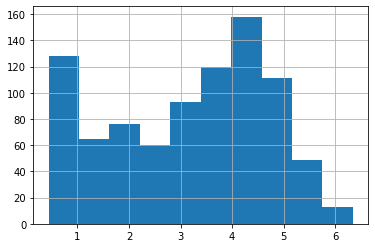

In [326]:
pd.set_option('display.max_columns', None)
print(dataList.columns)


dataList['LAI_Warren_up'].astype(float).loc[dataList['LAI_Warren_up'].astype(float) > 0 ].hist()

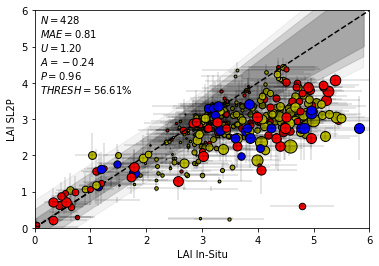

In [300]:
fig = plt.figure();
r1 = plotDataDGBOV(GBOVDataLAISL2P.loc[gbov['Site'].isin(sites_North_America)],GBOVDataLAISL2P.loc[gbov['Site'].isin(sites_North_America)],'LAI_Warren','sampleLAI',40,'/home/richard_fernandes/validation/LAIGBOV20m.png',0,fig,'LAI_Miller')
r2 = plotDataDCCRS2(ccrsDataLAISL2P.loc[gbov['Site'].isin(sites_North_America)],ccrsDataLAISL2P.loc[gbov['Site'].isin(sites_North_America)],'PAICEV61','sampleLAI',40,'/home/richard_fernandes/validation/LAIGBOV20m.png',0,fig,'PAICEV61')   

ax = plt.gca()
n = r1['count'] + r2['count']
textstr = '\n'.join(( 
    r'$N=%d$' % n, 
    r'$MAE=%.2f$' % ((r1['count']*r1['MAE']+r1['count']*r2['MAE'])/n, ), 
    r'$U=%.2f$' % ((r1['count']*r1['U']+r1['count']*r2['MAE'])/n, ), 
    r'$A=%.2f$' % ((r1['count']*r1['A']+r1['count']*r2['MAE'])/n, ), 
    r'$P=%.2f$' % ((r1['count']*r1['P']+r1['count']*r2['MAE'])/n, ), 
    r'$THRESH=%.2f$%%' % ((r1['count']*r1['thresh']+r1['thresh']*r2['MAE'])/n, )))
ax.text(0.015, 0.985, textstr,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
fig.savefig('/home/richard_fernandes/validation/LAISL2P20m.png', bbox_inches='tight')

0


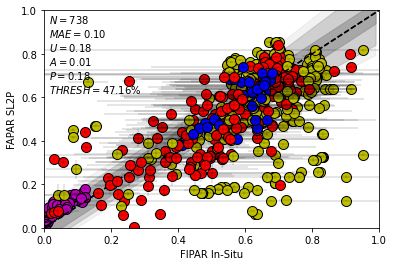

In [220]:
fig = plt.figure();
r1=plotDataDGBOV(GBOVDatafAPARSL2P,GBOVDatafAPARSL2P,'FIPAR','samplefAPAR',50,'/home/richard_fernandes/validation/fAPARGBOV20m.png',0,fig)
r2=plotDataDCCRS2(ccrsDatafAPARSL2P,ccrsDatafAPARSL2P,'Daily_Integrated_Black_Sky_fAPAR','samplefAPAR',50,'/home/richard_fernandes/validation/fAPARGBOV20m.png',0,fig)

ax = plt.gca()
n = r1['count'] + r2['count']
textstr = '\n'.join(( 
     r'$N=%d$' % n, 
     r'$MAE=%.2f$' % ((r1['count']*r1['MAE']+r1['count']*r2['MAE'])/n, ), 
     r'$U=%.2f$' % ((r1['count']*r1['U']+r1['count']*r2['MAE'])/n, ), 
     r'$A=%.2f$' % ((r1['count']*r1['A']+r1['count']*r2['MAE'])/n, ), 
     r'$P=%.2f$' % ((r1['count']*r1['P']+r1['count']*r2['MAE'])/n, ), 
     r'$THRESH=%.2f$%%' % ((r1['count']*r1['thresh']+r1['thresh']*r2['MAE'])/n, )))
ax.text(0.015, 0.985, textstr,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
fig.savefig('/home/richard_fernandes/validation/fAPARGBOV20m.png', bbox_inches='tight')

0


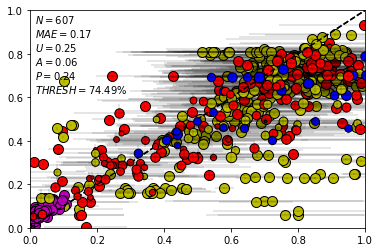

In [233]:
fig = plt.figure();
r1=plotDataDGBOV(GBOVDatafCOVERSL2P,GBOVDatafCOVERSL2P,'FCOVER','samplefCOVER',50,'/home/richard_fernandes/validation/fCOVERGBOV20m.png',0,fig)
r2=plotDataDCCRS2(ccrsDatafCOVERSL2P,ccrsDatafCOVERSL2P,'fcover','samplefCOVER',50,'/home/richard_fernandes/validation/fCOVERGBOV20m.png',0,fig)

ax = plt.gca()
n = r1['count'] + r2['count']
textstr = '\n'.join(( 
     r'$N=%d$' % n, 
     r'$MAE=%.2f$' % ((r1['count']*r1['MAE']+r1['count']*r2['MAE'])/n, ), 
     r'$U=%.2f$' % ((r1['count']*r1['U']+r1['count']*r2['MAE'])/n, ), 
     r'$A=%.2f$' % ((r1['count']*r1['A']+r1['count']*r2['MAE'])/n, ), 
     r'$P=%.2f$' % ((r1['count']*r1['P']+r1['count']*r2['MAE'])/n, ), 
     r'$THRESH=%.2f$%%' % ((r1['count']*r1['thresh']+r1['thresh']*r2['MAE'])/n, )))
ax.text(0.015, 0.985, textstr,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
fig.savefig('/home/richard_fernandes/validation/fCOVERGBOV20m.png', bbox_inches='tight')

In [ ]:
fig = plt.figure();
r1 = plotDataDGBOV(GBOVDataLAISL2P,GBOVDataLAISL2P,'LAI_Warren','sampleLAI',40,'/home/richard_fernandes/validation/LAIGBOV20m.png',0,fig)
r2 = plotDataDCCRS2(ccrsDataLAISL2P,ccrsDataLAISL2P,'PAICEV61','sampleLAI',40,'/home/richard_fernandes/validation/LAIGBOV20m.png',0,fig)
ax = plt.gca()
n = r1['count'] + r2['count']
textstr = '\n'.join(( 
    r'$N=%d$' % n, 
    r'$MAE=%.2f$' % ((r1['count']*r1['MAE']+r1['count']*r2['MAE'])/n, ), 
    r'$U=%.2f$' % ((r1['count']*r1['U']+r1['count']*r2['MAE'])/n, ), 
    r'$A=%.2f$' % ((r1['count']*r1['A']+r1['count']*r2['MAE'])/n, ), 
    r'$P=%.2f$' % ((r1['count']*r1['P']+r1['count']*r2['MAE'])/n, ), 
    r'$THRESH=%.2f$%%' % ((r1['count']*r1['thresh']+r1['thresh']*r2['MAE'])/n, )))
ax.text(0.015, 0.985, textstr,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
fig.savefig('/home/richard_fernandes/validation/LAISL2P20m.png', bbox_inches='tight')

In [227]:
print(GBOVDatafCOVERSL2P[449])

{'Elevation': 983, 'FCOVER_down': '0', 'FCOVER_down_err': '0', 'FCOVER_up': -999, 'FCOVER_up_err': -999, 'GBOV_Email': 'support-copernicus-gbov@acri-st.fr', 'GBOV_ID': 'GBOV_RM4_1648', 'GROUND_DATA_PI': 'Courtney Meier', 'GROUND_DATA_PIs_Email': 'cmeier@battelleecology.org', 'IGBP_class': 'Closed Shrublands', 'Network': 'NEON', 'PLOT_ID': 'SRER_057', 'Site': 'SantaRita', 'Tcanopy_down': '0.997', 'Tcanopy_down_err': 0.009999999776482582, 'Tcanopy_up': -999, 'Tcanopy_up_err': -999, 'Version': 2, 'down_flag': 0, 'samplefCOVER': [{'bandName': 'date', 'data': [18123.42857142857, 18501, 18501, 18501, 18123.42857142857, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18501, 18123.42857142857, 18501, 18501, 18501, 18501, 18501, 18123.42857142857, 18501, 18501, 18501, 18128.326530612245, 18506, 18506, 18506, 18128.326530612245, 18506, 18506, 18506, 18506, 18506, 18506, 18506, 18506, 18506, 18506, 18506, 18506, 18506, 

In [133]:

with open("E:/wp3/Validation/LAICCRSFLIGHT.txt", "rb") as fp:   #Pickling
    ccrsDataLAIFLIGHT = pickle.load(fp)
with open("E:/wp3/Validation/fAPARCCRSFLIGHT.txt", "rb") as fp:   #Pickling
    ccrsDatafAPARFLIGHT = pickle.load(fp)
with open("E:/wp3/Validation/fCOVERCCRSFLIGHT.txt", "rb") as fp:   #Pickling
    ccrsDatafCOVERFLIGHT = pickle.load(fp)
with open("E:/wp3/Validation/DASFCCRSFLIGHT.txt", "rb") as fp:   #Pickling
    ccrsDataDASFFLIGHT = pickle.load(fp)

In [134]:
with open("E:/wp3/Validation/data_GBOV_RM6_20210313_LAI_SL2PFLIGHT_v2.txt", "rb") as fp:   #Pickling
    GBOVDataLAIFLIGHT = pickle.load(fp)
with open("E:/wp3/Validation/data_GBOV_RM6_20210313_fAPAR_SL2FLIGHT_v2.txt", "rb") as fp:   #Pickling
    GBOVDatafAPARFLIGHT = pickle.load(fp)
with open("E:/wp3/Validation/data_GBOV_RM6_20210313_DASF_SL2PFLIGHT_v2.txt", "rb") as fp:   #Pickling
    GBOVDataSL2PFLIGHT = pickle.load(fp)


0


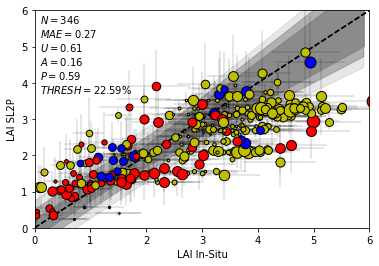

In [136]:
fig = plt.figure();
r1 = plotDataDGBOV(GBOVDataDASFCCRS,GBOVDataLAISL2P,'LAI_Warren','sampleLAI',50,'E:\wp3\Validation\LAIGBOVa.png',0,fig)
r2 = plotDataDCCRS2(ccrsDataLAISL2P,ccrsDataLAISL2P,'PAICEV61','sampleLAI',50,'E:\wp3\Validation\LAIGBOVa.png',0,fig)
#r1 = plotDataDGBOV(GBOVDataLAISL2P,GBOVDataLAISL2P,'LAIe_Miller','sampleLAI',50,'E:\wp3\Validation\LAIGBOVa.png',0,fig)
#r2 = plotDataDCCRS2(ccrsDataLAISL2P,ccrsDataLAISL2P,'PAIEMiller','sampleLAI',50,'E:\wp3\Validation\LAIGBOVa.png',0,fig)
ax = plt.gca()
n = r1['count'] + r2['count']
textstr = '\n'.join(( 
    r'$N=%d$' % n, 
    r'$MAE=%.2f$' % ((r1['count']*r1['MAE']+r1['count']*r2['MAE'])/n, ), 
    r'$U=%.2f$' % ((r1['count']*r1['U']+r1['count']*r2['MAE'])/n, ), 
    r'$A=%.2f$' % ((r1['count']*r1['A']+r1['count']*r2['MAE'])/n, ), 
    r'$P=%.2f$' % ((r1['count']*r1['P']+r1['count']*r2['MAE'])/n, ), 
    r'$THRESH=%.2f$%%' % ((r1['count']*r1['thresh']+r1['thresh']*r2['MAE'])/n, )))
ax.text(0.015, 0.985, textstr,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
fig.savefig('E:\wp3\Validation\LAISL2P.png', bbox_inches='tight')

0


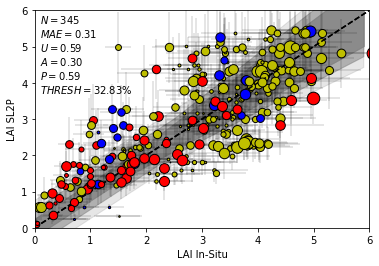

In [137]:
fig = plt.figure();
r1 = plotDataDGBOV(GBOVDataDASFCCRS,GBOVDataLAICCRS,'LAI_Warren','sampleLAI',50,'E:\wp3\Validation\LAIGBOV.png',0,fig)
r2 = plotDataDCCRS2(ccrsDataDASFCCRS,ccrsDataLAICCRS,'PAICEV61','sampleLAI',50,'E:\wp3\Validation\LAIGBOV.png',0,fig)
#r1 = plotDataDGBOVFLIGHT(GBOVDataDASFCCRS,GBOVDataLAIFLIGHT,'LAI_Warren','sampleLAI',50,'E:\wp3\Validation\LAIGBOV.png',1000,fig)
#r2 = plotDataDCCRS2FLIGHT(ccrsDataDASFCCRS,ccrsDataLAIFLIGHT,'PAICEV61','sampleLAI',50,'E:\wp3\Validation\LAIGBOV.png',1000,fig)

ax = plt.gca()
n = r1['count'] + r2['count']
textstr = '\n'.join(( 
    r'$N=%d$' % n, 
    r'$MAE=%.2f$' % ((r1['count']*r1['MAE']+r1['count']*r2['MAE'])/n, ), 
    r'$U=%.2f$' % ((r1['count']*r1['U']+r1['count']*r2['MAE'])/n, ), 
    r'$A=%.2f$' % ((r1['count']*r1['A']+r1['count']*r2['MAE'])/n, ), 
    r'$P=%.2f$' % ((r1['count']*r1['P']+r1['count']*r2['MAE'])/n, ), 
    r'$THRESH=%.2f$%%' % ((r1['count']*r1['thresh']+r1['thresh']*r2['MAE'])/n, )))
ax.text(0.015, 0.985, textstr,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
fig.savefig('E:\wp3\Validation\LAICCRS.png', bbox_inches='tight')

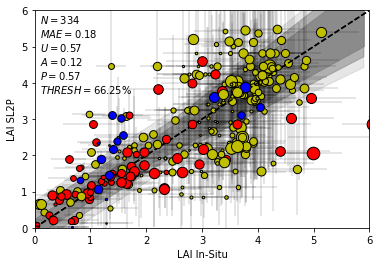

In [124]:
fig = plt.figure();

r1 = plotDataDGBOVFLIGHT(GBOVDataDASFCCRS,GBOVDataLAICCRS,'LAI_Warren','sampleLAI',50,'E:\wp3\Validation\LAIGBOV.png',1000,fig)
r2 = plotDataDCCRS2FLIGHT(ccrsDataDASFCCRS,ccrsDataLAICCRS,'PAICEV61','sampleLAI',50,'E:\wp3\Validation\LAIGBOV.png',1000,fig)

ax = plt.gca()
n = r1['count'] + r2['count']
textstr = '\n'.join(( 
    r'$N=%d$' % n, 
    r'$MAE=%.2f$' % ((r1['count']*r1['MAE']+r1['count']*r2['MAE'])/n, ), 
    r'$U=%.2f$' % ((r1['count']*r1['U']+r1['count']*r2['MAE'])/n, ), 
    r'$A=%.2f$' % ((r1['count']*r1['A']+r1['count']*r2['MAE'])/n, ), 
    r'$P=%.2f$' % ((r1['count']*r1['P']+r1['count']*r2['MAE'])/n, ), 
    r'$THRESH=%.2f$%%' % ((r1['count']*r1['thresh']+r1['thresh']*r2['MAE'])/n, )))
ax.text(0.015, 0.985, textstr,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
fig.savefig('E:\wp3\Validation\LAICCRSFLIGHT.png', bbox_inches='tight')

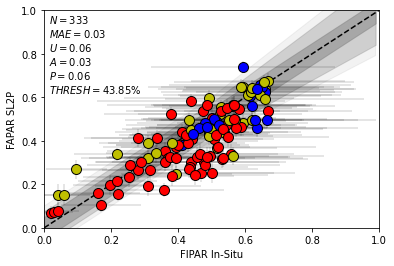

In [1284]:
fig = plt.figure();
r1=plotDataDGBOV(GBOVDataDASFCCRS,GBOVDatafAPARSL2P,'FIPAR','samplefAPAR',50,'E:\wp3\Validation\FCOVER3.png',0,fig)
r2=plotDataDCCRS2(ccrsDataDASFCCRS,ccrsDatafAPARSL2P,'Daily_Integrated_Black_Sky_fAPAR','samplefAPAR',50,'E:\wp3\Validation\FCOVER3.png',0,fig)

ax = plt.gca()
n = r1['count'] + r2['count']
textstr = '\n'.join(( 
     r'$N=%d$' % n, 
     r'$MAE=%.2f$' % ((r1['count']*r1['MAE']+r1['count']*r2['MAE'])/n, ), 
     r'$U=%.2f$' % ((r1['count']*r1['U']+r1['count']*r2['MAE'])/n, ), 
     r'$A=%.2f$' % ((r1['count']*r1['A']+r1['count']*r2['MAE'])/n, ), 
     r'$P=%.2f$' % ((r1['count']*r1['P']+r1['count']*r2['MAE'])/n, ), 
     r'$THRESH=%.2f$%%' % ((r1['count']*r1['thresh']+r1['thresh']*r2['MAE'])/n, )))
ax.text(0.015, 0.985, textstr,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
fig.savefig('E:/wp3/Validation/fAPARSL2P.png', bbox_inches='tight')

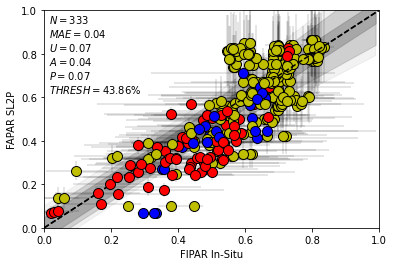

In [1279]:
fig = plt.figure();
r1=plotDataDGBOV(GBOVDataDASFCCRS,GBOVDatafAPARCCRS,'FIPAR','samplefAPAR',50,'E:\wp3\Validation\FCOVER3.png',0,fig)
r2=plotDataDCCRS2(ccrsDataDASFCCRS,ccrsDatafAPARCCRS,'Daily_Integrated_Black_Sky_fAPAR','samplefAPAR',50,'E:\wp3\Validation\FCOVER3.png',0,fig)

ax = plt.gca()
n = r1['count'] + r2['count']
textstr = '\n'.join(( 
    r'$N=%d$' % n, 
    r'$MAE=%.2f$' % ((r1['count']*r1['MAE']+r1['count']*r2['MAE'])/n, ), 
    r'$U=%.2f$' % ((r1['count']*r1['U']+r1['count']*r2['MAE'])/n, ), 
    r'$A=%.2f$' % ((r1['count']*r1['A']+r1['count']*r2['MAE'])/n, ), 
    r'$P=%.2f$' % ((r1['count']*r1['P']+r1['count']*r2['MAE'])/n, ), 
    r'$THRESH=%.2f$%%' % ((r1['count']*r1['thresh']+r1['thresh']*r2['MAE'])/n, )))
ax.text(0.015, 0.985, textstr,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
fig.savefig('E:/wp3/Validation/fAPARCCRS.png', bbox_inches='tight')

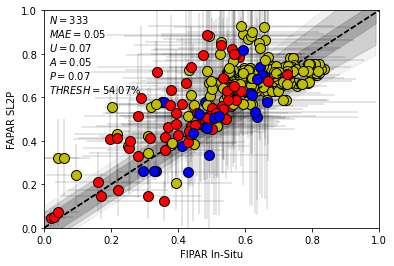

In [1295]:
fig = plt.figure();

r1 = plotDataDGBOV(GBOVDataDASFCCRS,GBOVDatafAPARCCRS,'FIPAR','samplefAPAR',50,'E:\wp3\Validation\LAIGBOV.png',1000,fig)
r2 = plotDataDCCRS2(ccrsDataDASFCCRS,ccrsDatafAPARCCRS,'Daily_Integrated_Black_Sky_fAPAR','samplefAPAR',50,'E:\wp3\Validation\LAIGBOV.png',1000,fig)

ax = plt.gca()
n = r1['count'] + r2['count']
textstr = '\n'.join(( 
    r'$N=%d$' % n, 
    r'$MAE=%.2f$' % ((r1['count']*r1['MAE']+r1['count']*r2['MAE'])/n, ), 
    r'$U=%.2f$' % ((r1['count']*r1['U']+r1['count']*r2['MAE'])/n, ), 
    r'$A=%.2f$' % ((r1['count']*r1['A']+r1['count']*r2['MAE'])/n, ), 
    r'$P=%.2f$' % ((r1['count']*r1['P']+r1['count']*r2['MAE'])/n, ), 
    r'$THRESH=%.2f$%%' % ((r1['count']*r1['thresh']+r1['thresh']*r2['MAE'])/n, )))
ax.text(0.015, 0.985, textstr,horizontalalignment='left',verticalalignment='top',transform=ax.transAxes)
fig.savefig('E:/wp3/Validation/fAPARCCRSFLIGHT.png', bbox_inches='tight')